# Modeling- Home Sale Price Analysis in Ames, Iowa

***

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Data Dictionary 

<details><summary>Ames Data Description</summary>
    
- [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
</details>

## Read the Data

In [3]:
train_1 = pd.read_csv('../datasets/ames_train.csv')
test_1 = pd.read_csv('../datasets/clean_test.csv')

In [4]:
pd.set_option('display.max_columns', 200)    
pd.set_option('display.max_rows', 500)


In [5]:
train_1.head()

,Id,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,SalePrice,Age,Other_Rooms,Garage_area/car,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Feedr,Condition_Norm,Condition_PosA,Bldg_Type_2FmCon,Bldg_Type_Duplx,Bldg_Type_TwnhsE,Bldg_Type_TwnhsI,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,is_Remodeled,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CemntBd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside
0,109,533352170,70.0,13517,3,3,6,8,1976,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,5,1,5,725,754,0,0.0,0.0,2,1,3,1,4,7,0,0,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,3,130500,34,3,237.5,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,544,531379050,43.0,11492,3,3,7,5,1996,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,5,1,5,913,1209,0,1.0,0.0,2,1,4,1,4,7,1,3,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,4,220000,13,4,279.5,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,153,535304180,68.0,7922,4,3,5,7,1953,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,3,1,5,1057,0,0,1.0,0.0,1,0,3,1,4,7,0,0,1953.0,1,1.0,3,3,3,0,52,0,0,0,0,0,0,1,109000,57,2,246.0,2,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,318,916386060,73.0,9802,4,3,5,5,2006,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,4,1,5,744,700,0,0.0,0.0,2,1,3,1,3,7,0,0,2007.0,3,2.0,3,3,3,100,0,0,0,0,0,0,0,4,174000,4,4,200.0,4,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,255,906425045,82.0,14235,3,3,6,8,1900,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,3,1,5,831,614,0,0.0,0.0,2,0,3,1,3,7,0,0,1957.0,1,2.0,3,3,1,0,59,0,0,0,0,0,0,3,138500,110,3,242.0,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [6]:
test_1.head()

,Id,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,Age,Other_Rooms,Garage_area/car,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Feedr,Condition_Norm,Condition_PosA,Bldg_Type_2FmCon,Bldg_Type_Duplx,Bldg_Type_TwnhsE,Bldg_Type_TwnhsI,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,is_Remodeled,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CemntBd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside
0,2658,902301120,69.000000,9142,4,3,6,8,1910,0.0,3,2,2,3,1,1,0,1,0,1020,4,0,2,908,1020,0,0,0,2,0,4,2,2,7,0,0,1910.0,1,1,1,1,3,0,60,112,0,0,0,0,0,4,96,5,440.0,2,1,0,0,1,0,0,1,0,2,0,1,0,0,0,1,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,2718,905108090,69.135288,9662,3,3,5,4,1977,0.0,3,3,4,3,1,1,0,1,0,1967,3,1,5,1967,0,0,0,0,2,0,6,2,3,7,0,0,1977.0,3,2,3,3,3,170,0,0,0,0,0,0,0,8,29,4,290.0,1,1,0,0,1,0,1,0,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2414,528218130,58.000000,17104,3,3,7,5,2006,0.0,4,3,4,4,3,6,554,1,0,100,5,1,5,664,832,0,1,0,2,1,3,1,4,7,1,4,2006.0,2,2,3,3,3,100,24,0,0,0,0,0,0,9,0,4,213.0,2,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1989,902207150,60.000000,8520,4,3,5,6,1923,0.0,4,3,3,3,1,1,0,1,0,968,3,1,5,968,0,0,0,0,1,0,2,1,3,7,0,0,1935.0,1,2,2,3,1,0,0,184,0,0,0,0,0,7,84,3,240.0,2,1,0,0,1,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
4,625,535105100,69.135288,9500,3,3,6,5,1963,247.0,3,3,4,3,1,4,609,1,0,785,4,1,5,1394,0,0,1,0,1,1,3,1,3,7,2,4,1963.0,2,2,3,3,3,0,76,0,0,185,0,0,0,7,46,3,257.0,2,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [7]:
train_1.shape, test_1.shape

((2029, 102), (878, 101))

In [8]:
train_1.isnull().sum().sum(),test_1.isnull().sum().sum()

(0, 0)

In [8]:
# #  Aligning the 2 datasets

# train, test = train_1.align(test_1, join='outer', axis=1)
# print(train)
# print(test)

      1st_Flr_SF  2nd_Flr_SF  3Ssn_Porch  Age  Bedroom_AbvGr  \
0            725         754           0   34              3   
1            913        1209           0   13              4   
2           1057           0           0   57              3   
3            744         700           0    4              3   
4            831         614           0  110              3   
...          ...         ...         ...  ...            ...   
2024        1728           0           0    1              3   
2025         861           0           0   69              1   
2026        1172         741           0   81              3   
2027        1200           0           0   53              3   
2028        1028         776           0   11              3   

      Bldg_Type_2FmCon  Bldg_Type_Duplx  Bldg_Type_TwnhsE  Bldg_Type_TwnhsI  \
0                    0                0                 0                 0   
1                    0                0                 0                

In [11]:
# train_col_list =[train.columns]
# print(train_col_list, len(train_col_list))

In [12]:
# test_col_list =[test.columns]
# print(test_col_list, len(train_col_list))

In [13]:
# test.SalePrice.isnull().sum()

In [14]:
# test.drop(columns = 'SalePrice', inplace = True)

In [14]:
# train.shape, test.shape

###  Linear Regression Model

In [18]:
def linear_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lr = LinearRegression()
    lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
    print('-' * 10)
    print('Linear regression cross validation scores: ', lr_scores)
    print('Linear regression mean cross validation score: ', np.mean(lr_scores))
    lr_model = lr.fit(X_train,y_train)
    preds = lr_model.predict(X_test)
    
    print('-----MODEL ACCURACY-----')
    print(f" Linear Regression model score= {lr_model.score(X_train, y_train)} ")
    print(f" Linear Regression prediction score= {lr_model.score(X_test, y_test)} ")
    print("-----METRICS-----")
    print(f" R2 score = {metrics.r2_score(y_test, preds)} ")
    print(f" Mean Absolute Error = {metrics.mean_absolute_error(y_test, preds)} ")
    print(f" Sum Squared Error = {metrics.mean_squared_error(y_test, preds)* y_test.shape[0]} ")
    print(f" Mean Squared Error = {metrics.mean_squared_error(y_true = y_test, y_pred = preds)} ")
    print(f" Root Mean Squared Error = {metrics.mean_squared_error(y_true=y_test, y_pred = preds, squared = False)} ")    
    print('-' * 10)
    plt.figure(figsize = (15,10))
    sns.scatterplot(preds, y_test)
    plt.title('Linear Regression Model Perfomace', fontsize=20)
    plt.xlabel('Predicted values', fontsize=15)
    plt.ylabel('Actual values', fontsize=15)
    plt.axline([0, 0], [1, 1], color='red')
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
    return lr_model

# cvs = cross_val_score(lr, Xz_train, yz_train, cv=10, scoring = 'neg_root_mean_squared_error')

## Features selection: Selecting all the columns for the basic model

In [15]:
#  Seperating target column

features_df = train_1.drop(columns=['SalePrice','Id', 'PID'], axis = 1)
features_df.head()

,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,Age,Other_Rooms,Garage_area/car,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Feedr,Condition_Norm,Condition_PosA,Bldg_Type_2FmCon,Bldg_Type_Duplx,Bldg_Type_TwnhsE,Bldg_Type_TwnhsI,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,is_Remodeled,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CemntBd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside
0,70.0,13517,3,3,6,8,1976,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,5,1,5,725,754,0,0.0,0.0,2,1,3,1,4,7,0,0,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,3,34,3,237.5,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,43.0,11492,3,3,7,5,1996,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,5,1,5,913,1209,0,1.0,0.0,2,1,4,1,4,7,1,3,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,4,13,4,279.5,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,68.0,7922,4,3,5,7,1953,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,3,1,5,1057,0,0,1.0,0.0,1,0,3,1,4,7,0,0,1953.0,1,1.0,3,3,3,0,52,0,0,0,0,0,0,1,57,2,246.0,2,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,73.0,9802,4,3,5,5,2006,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,4,1,5,744,700,0,0.0,0.0,2,1,3,1,3,7,0,0,2007.0,3,2.0,3,3,3,100,0,0,0,0,0,0,0,4,4,4,200.0,4,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,82.0,14235,3,3,6,8,1900,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,3,1,5,831,614,0,0.0,0.0,2,0,3,1,3,7,0,0,1957.0,1,2.0,3,3,1,0,59,0,0,0,0,0,0,3,110,3,242.0,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [16]:
features_df.shape

(2029, 99)

----------
Linear regression cross validation scores:  [0.87960579 0.87371065 0.66044108 0.84125966 0.75996689]
Linear regression mean cross validation score:  0.8029968133375276
-----MODEL ACCURACY-----
 Linear Regression model score= 0.8719902985733128 
 Linear Regression prediction score= 0.8710163838583678 
-----METRICS-----
 R2 score = 0.8710163838583678 
 Mean Absolute Error = 20001.46762259167 
 Sum Squared Error = 498221417782.787 
 Mean Squared Error = 818097566.1457914 
 Root Mean Squared Error = 28602.40490143777 
----------


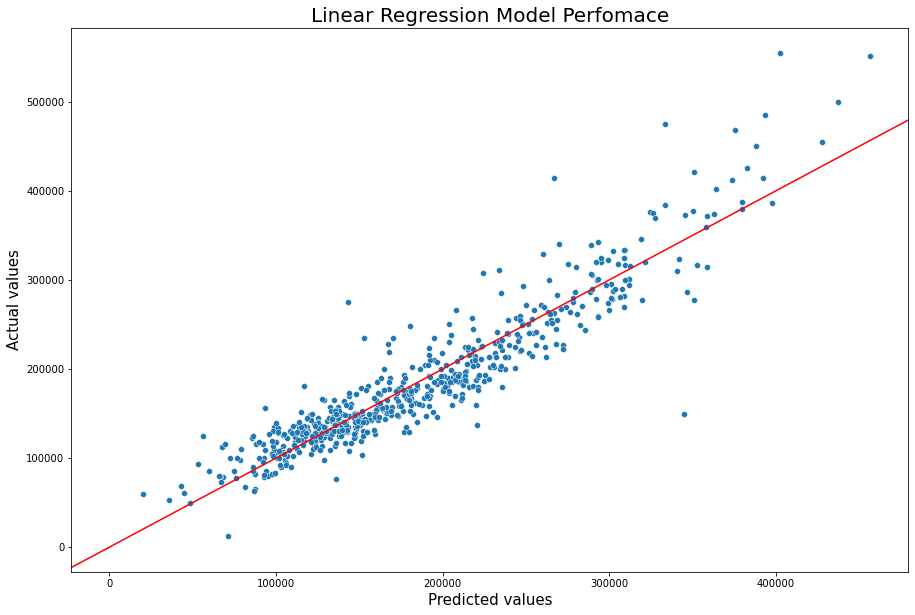

In [20]:
X = features_df
y = train_1['SalePrice']

lr_model = linear_reg(X,y)

# Model 1: Linear regression using standardization

In [21]:
def ss_linear_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    ss = StandardScaler()
    Xs_train = ss.fit_transform(X_train)
    Xs_test = ss.transform(X_test)
    lr = LinearRegression()
    lr_scores = cross_val_score(lr, Xs_train, y_train, cv=5)
    print('-' * 10)
    print('Linear regression cross validation scores: ', lr_scores)
    print('Linear regression mean cross validation score: ', np.mean(lr_scores))
    lr_model = lr.fit(Xs_train,y_train)
    preds = lr_model.predict(Xs_test)
    print('-----MODEL ACCURACY-----')
    print(f" Linear Regression model score= {lr_model.score(Xs_train, y_train)} ")
    print(f" Linear Regression prediction score= {lr_model.score(Xs_test, y_test)} ")
    print("-----METRICS-----")
    print(f" R2 score = {metrics.r2_score(y_test, preds)} ")
    print(f" Mean Absolute Error = {metrics.mean_absolute_error(y_test, preds)} ")
    print(f" Sum Squared Error = {metrics.mean_squared_error(y_test, preds)* y_test.shape[0]} ")
    print(f" Mean Squared Error = {metrics.mean_squared_error(y_true = y_test, y_pred = preds)} ")
    print(f" Root Mean Squared Error = {metrics.mean_squared_error(y_true=y_test, y_pred = preds, squared = False)} ")    
    print('-' * 10)
    plt.figure(figsize = (15,10))
    sns.regplot(preds, y_test)
    plt.title('Linear Regression Model Perfomace', fontsize=20)
    plt.xlabel('Predicted values', fontsize=15)
    plt.ylabel('Actual values', fontsize=15)
    return (lr_model, ss)


----------
Linear regression cross validation scores:  [0.87960579 0.87371065 0.66044108 0.84125966 0.75996689]
Linear regression mean cross validation score:  0.8029968133375369
-----MODEL ACCURACY-----
 Linear Regression model score= 0.8719902985733127 
 Linear Regression prediction score= 0.8710163838583693 
-----METRICS-----
 R2 score = 0.8710163838583693 
 Mean Absolute Error = 20001.467622591463 
 Sum Squared Error = 498221417782.78125 
 Mean Squared Error = 818097566.145782 
 Root Mean Squared Error = 28602.404901437607 
----------


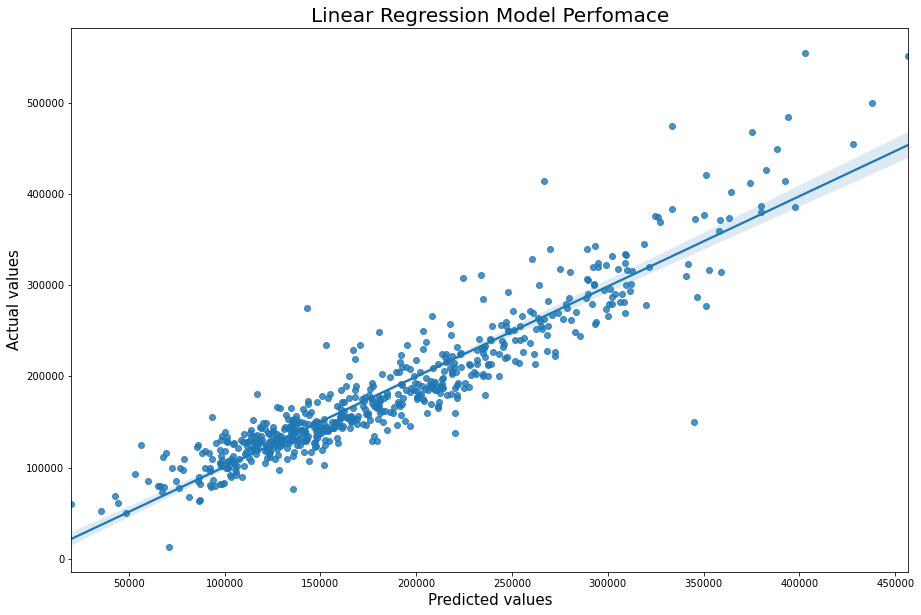

In [22]:
X = features_df
y = train_1['SalePrice']
(sslr_model, ss) = ss_linear_reg(X,y)


##### Linear Regression Interpretation: Our model Explains 89% of the variation in the data. The Accuracy scores tells us that our model is slightly overfitting. and very close to the predicted score. R2= 87% of the variation in Saleprice is explained by the Features

Interpretation of coefficients
Now that we have multiple variables, our interpretation are holding all other variables constant.

For every 1 unit increase in Xi, we expect y to increase by $\beta_i$, holding all else constant.



### Kaggle output using the test data

In [ ]:
ks_test = ss.transform(test)
kaggle_preds = sslr_model.predict(ks_test)
print('KAggle shape:', kaggle_preds.shape)
kaggle_output = {'Id':test['Id'], 'SalePrice':kaggle_preds}
kaggle_output = pd.DataFrame(kaggle_output)
kaggle_output.to_csv('./demo_sslr_trial1.csv', index = False)

## Model 1: Ridge Regression

In [184]:
features_df.columns


Index(['Lot_Frontage', 'Lot_Area', 'Lot_Shape', 'Land_Slope', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Heating_QC', 'Central_Air', 'Electrical', '1st_Flr_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath',
       'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr',
       'Kitchen_Qual', 'Functional', 'Fireplaces', 'Fireplace_Qu',
       'Garage_Yr_Blt', 'Garage_Finish', 'Garage_Cars', 'Garage_Qual',
       'Garage_Cond', 'Paved_Drive', 'Wood_Deck_SF', 'Open_Porch_SF',
       'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Fence',
       'Misc_Val', 'Mo_Sold', 'Age', 'Other_Rooms', 'Garage_area/car',
       'Neighb_Qual', 'Street_Pave', 'Land_Contour_HLS', 'Land_Contour_Low',
       'Land_Contour_Lvl', 'MS_Zoning_RH', 'MS_Zoning_RL', 'M

In [45]:
X = features_df
y = train['SalePrice']

optimal alpha= 10.0
Ridge model_scores= 0.871877224248386
Ridge model prediction score = 0.8712153223980524
 Root Mean Squared Error = 28580.338857031733 


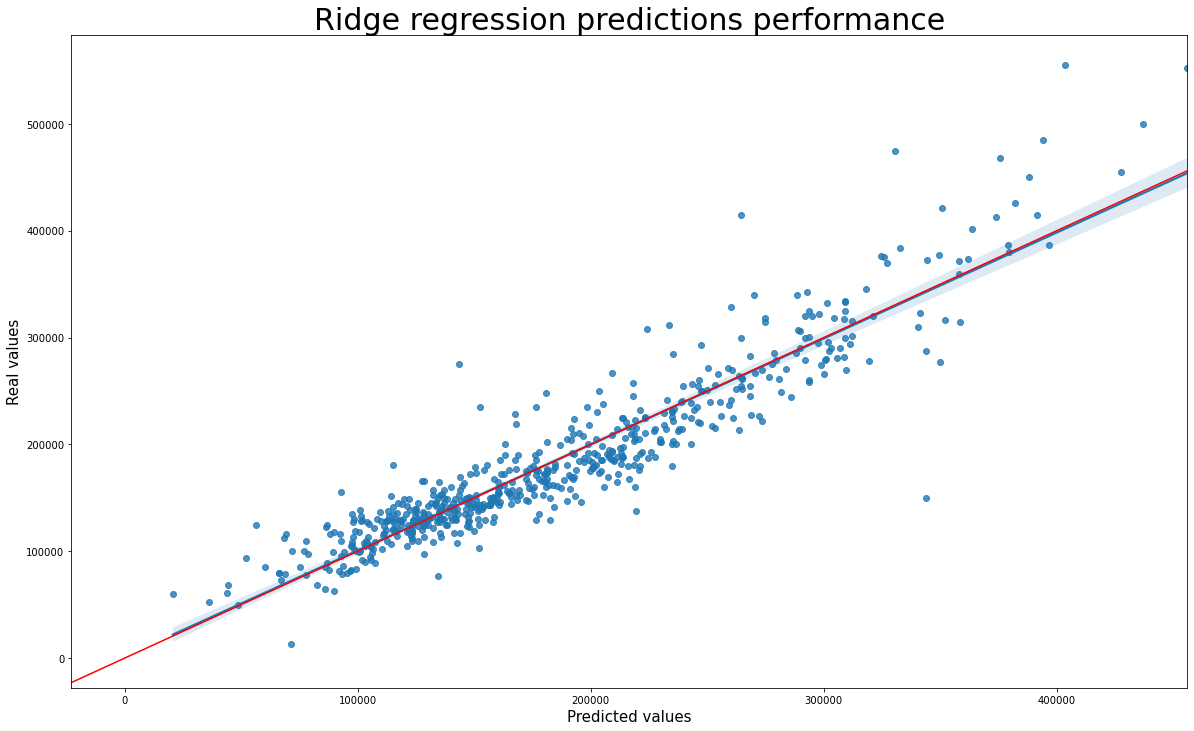

In [23]:
from sklearn.linear_model import RidgeCV, Ridge

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)


sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)


ridge_cv = RidgeCV()

# Fit model using best ridge alpha!
model = ridge_cv.fit(Z_train, y_train)

# Here is the optimal value of alpha

print('optimal alpha=' ,model.alpha_)
print('Ridge model_scores=', model.score(Z_train, y_train))
print('Ridge model prediction score =', model.score(Z_test, y_test))
preds = model.predict(Z_test)

print(f" Root Mean Squared Error = {metrics.mean_squared_error(y_true=y_test, y_pred = preds, squared = False)} ")    

plt.figure(figsize = (20,12))
sns.regplot(preds, y_test)
plt.title('Ridge regression predictions performance', fontsize=30)
plt.xlabel('Predicted values', fontsize=15)
plt.ylabel('Real values', fontsize=15)
plt.axline([0, 0], [1, 1], color='red')
 


### Model 1: LASSO Regression

In [28]:
def lasso_reg(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    ss = StandardScaler()
    Xs_train = ss.fit_transform(X_train)
    Xs_test = ss.transform(X_test)
    lasso = LassoCV()
    lasso.fit(Xs_train, y_train)
    opt_lasso = Lasso(alpha=lasso.alpha_)
    opt_lasso_scores = cross_val_score(opt_lasso, X_train, y_train, cv=5)
    print('Optimal alpha: ', lasso.alpha_)
    print('Lasso regression cross validation scores: ', opt_lasso_scores)
    print('Lasso regression cross validation mean score: ', np.mean(opt_lasso_scores))
    print('Lasso regression cross validation scores standard deviation: ', np.std(opt_lasso_scores))
    opt_lasso.fit(Xs_train,y_train)
    opt_lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':opt_lasso.coef_,
                            'abs_coef':np.abs(opt_lasso.coef_)})
    opt_lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    print('Percent variables zeroed out: ', np.sum((opt_lasso.coef_ == 0))/float(X_train.shape[1]))
    print(opt_lasso_coefs)
    predictions = opt_lasso.predict(Xs_test)
    print('Lasso regression model score: ', opt_lasso.score(Xs_train, y_train))
    print('Lasso regression prediction score: ', opt_lasso.score(Xs_test, y_test))
    print(f" Root Mean Squared Error = {metrics.mean_squared_error(y_true=y_test, y_pred = predictions, squared = False)} ")    
    plt.figure(figsize = (20,12))
    sns.scatterplot(predictions, y_test)
    plt.title('Lasso regression predictions performance', fontsize=30)
    plt.xlabel('Predicted values', fontsize=15)
    plt.ylabel('Real values', fontsize=15)
    plt.axline([0, 0], [1, 1], color='red')
    plt.figure(figsize=(8,13))
    sns.barplot(x='coef', y='variable', data=opt_lasso_coefs)
    plt.xticks(fontsize=14,rotation=90)
    plt.xlabel('Weight Coefficients', fontsize=16)
    plt.ylabel('Features', fontsize=16)
    return (opt_lasso, ss)

Optimal alpha:  710.6795815763935
Lasso regression cross validation scores:  [0.87963274 0.85844009 0.6198572  0.83587134 0.75439569]
Lasso regression cross validation mean score:  0.7896394116271358
Lasso regression cross validation scores standard deviation:  0.0949082096492533
Percent variables zeroed out:  0.4444444444444444
               variable          coef      abs_coef
21           1st_Flr_SF  16118.191374  16118.191374
4          Overall_Qual  14391.081358  14391.081358
22           2nd_Flr_SF  10818.328543  10818.328543
52          Neighb_Qual   9624.998219   9624.998219
8            Exter_Qual   7449.410649   7449.410649
47             Misc_Val  -6592.234792   6592.234792
30         Kitchen_Qual   6545.199129   6545.199129
36          Garage_Cars   5783.896497   5783.896497
7          Mas_Vnr_Area   5725.143364   5725.143364
65     Bldg_Type_TwnhsE  -4897.471049   4897.471049
50          Other_Rooms   4872.566414   4872.566414
12        Bsmt_Exposure   4818.249373   4818.

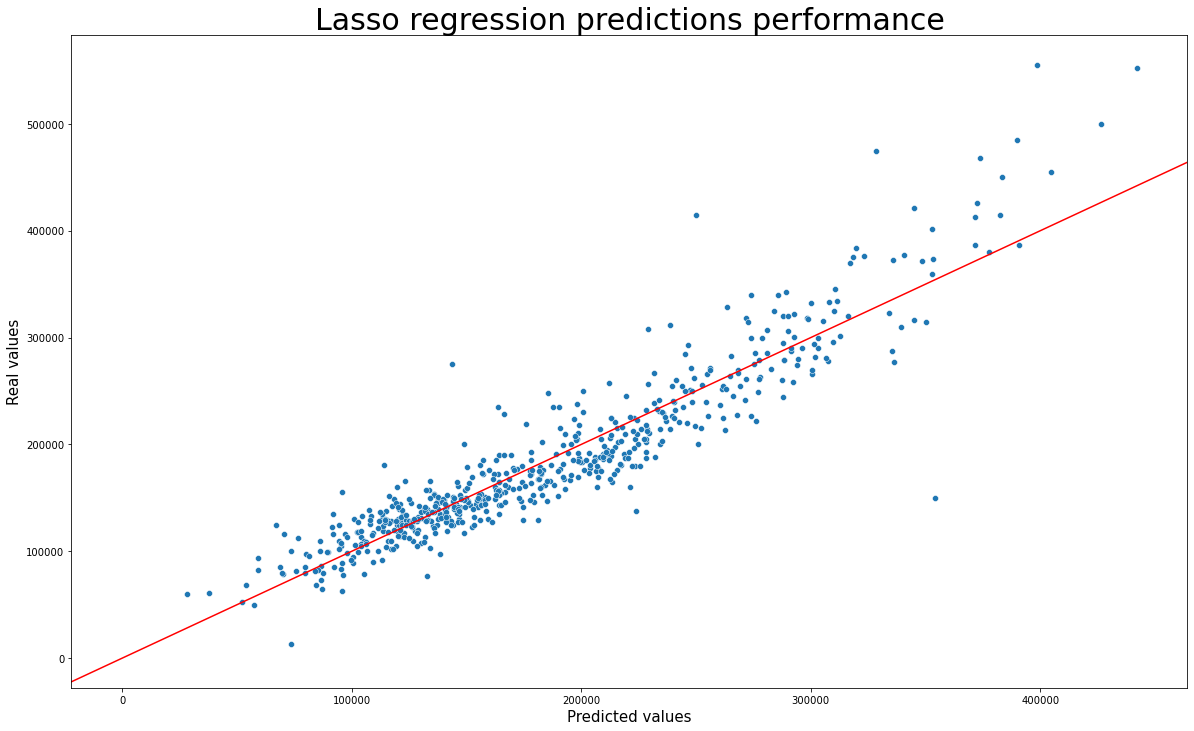

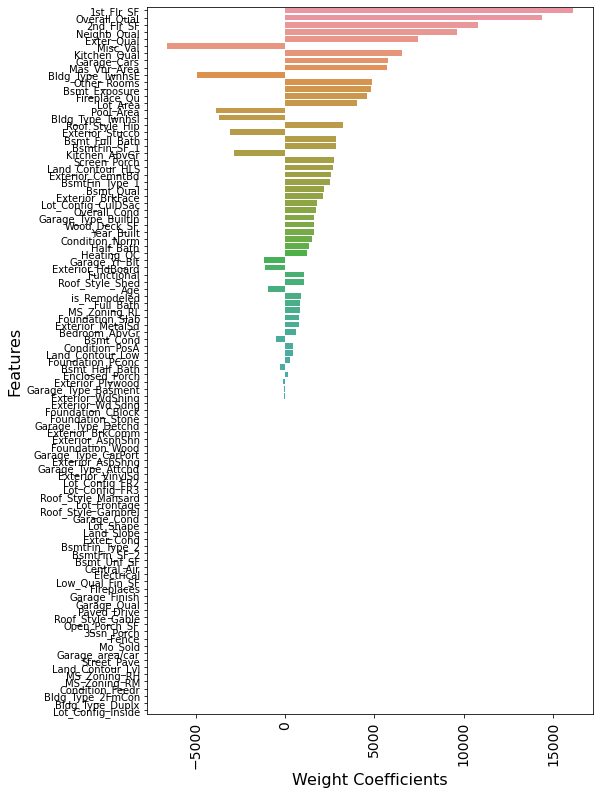

In [29]:

(lasso_m1, ss)=lasso_reg(X,y)

## Summary of initial Model

In [244]:

rmse_score_compare = pd.DataFrame({'Model 1':['Linear', 'Ridge','LASSO'],
                            'RMSE':[28602.404,28776.460 ,28805.138 ], 
                                   'Model score':[0.871990, 0.8684719, 0.86511],
                                  'Prediction score': [0.871016, 0.869441, 0.86918]})
print(rmse_score_compare)

  Model 1       RMSE  Model score  Prediction score
0  Linear  28602.404     0.871990          0.871016
1   Ridge  28776.460     0.868472          0.869441
2   LASSO  28805.138     0.865110          0.869180


#### We can see from the above models that the models did not differ a whole lot from each other. the Sores were almost similar and no one model performed better than the other. 


## Model 2: selected features

#### We can Continue with a model with selected features. Lets look at the correlations of the features and select the top 30 most correlated features and see how the model performs. Next we can model on the non-categorical features to see the difference.

In [52]:
train_1.corr()[['SalePrice']].sort_values('SalePrice', ascending = False)


,SalePrice
SalePrice,1.000000
Overall_Qual,0.797463
Exter_Qual,0.709869
Kitchen_Qual,0.689562
Neighb_Qual,0.655758
Garage_Cars,0.645071
1st_Flr_SF,0.616066
Bsmt_Qual,0.608673
Other_Rooms,0.565125
Year_Built,0.564011


In [31]:
# Model 2a: selected features
corr_features = ['Overall_Qual',
'Exter_Qual',
# 'Kitchen_Qual',
'Neighb_Qual',
'Garage_Cars',
'1st_Flr_SF',
# 'Bsmt_Qual',
'Other_Rooms',
'Year_Built',
'Garage_Finish',
# 'Fireplace_Qu',
'Full_Bath',
'Foundation_PConc',
'Mas_Vnr_Area',
'Fireplaces',
'Heating_QC',
'Bsmt_Exposure',
'BsmtFin_SF_1',
'Garage_Type_Attchd',
'Open_Porch_SF',
'Lot_Frontage',
# 'BsmtFin_Type_1',
'Exterior_VinylSd',
'Wood_Deck_SF',
'Lot_Area',
'Half_Bath',
'Bsmt_Full_Bath',
'Garage_Qual',
'Roof_Style_Hip',
'Paved_Drive',
'Central_Air',
# 'Garage_Cond',
# 'Garage_Yr_Blt',
'2nd_Flr_SF',
'Electrical',
'Garage_Type_BuiltIn',
'Land_Contour_HLS',
'Bsmt_Cond',
'MS_Zoning_RL',
'Roof_Style_Gable',
'Lot_Shape',
'MS_Zoning_RM',
'Foundation_CBlock',
'Garage_Type_Detchd',
'Age']

In [32]:
X2 = train_1[corr_features]
y=train_1['SalePrice']




#### Linear Regression for Model 2

----------
Linear regression cross validation scores:  [0.85681961 0.85508065 0.67564416 0.84495671 0.76961102]
Linear regression mean cross validation score:  0.8004224284839621
-----MODEL ACCURACY-----
 Linear Regression model score= 0.8294872502001039 
 Linear Regression prediction score= 0.8530208561893623 
-----METRICS-----
 R2 score = 0.8530208561893623 
 Mean Absolute Error = 21182.701960977367 
 Sum Squared Error = 567732240763.2522 
 Mean Squared Error = 932236848.543928 
 Root Mean Squared Error = 30532.55391453404 
----------


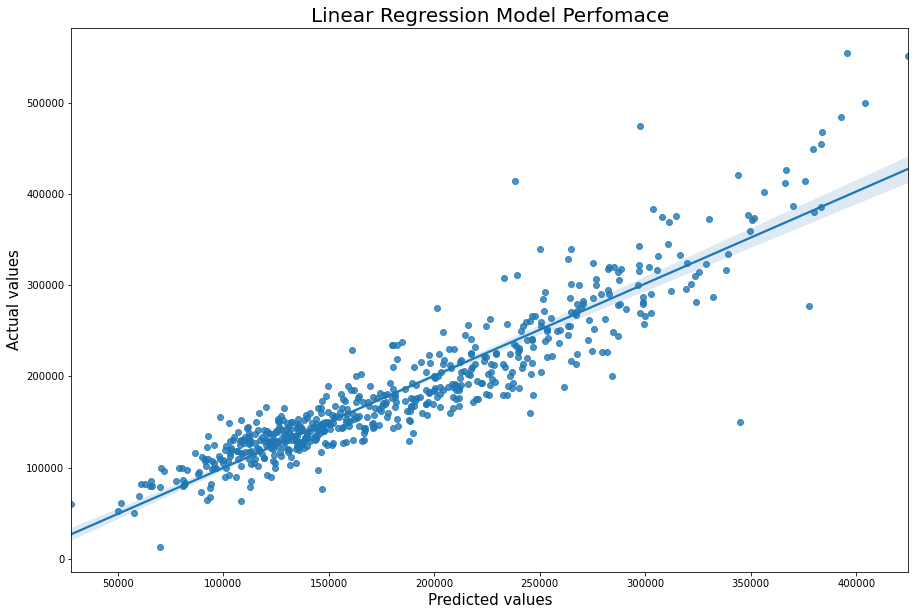

In [33]:
X2 = train_1[corr_features]
y=train_1['SalePrice']
(sslr_model, ss) = ss_linear_reg(X2,y)


### Ridge Regression for Model 2:

optimal alpha= 10.0
Ridge model_scores= 0.8294500163869606
Ridge model prediction score = 0.8532284839323906
 Root Mean Squared Error = 30510.98063042248 


Text(0, 0.5, 'Real values')

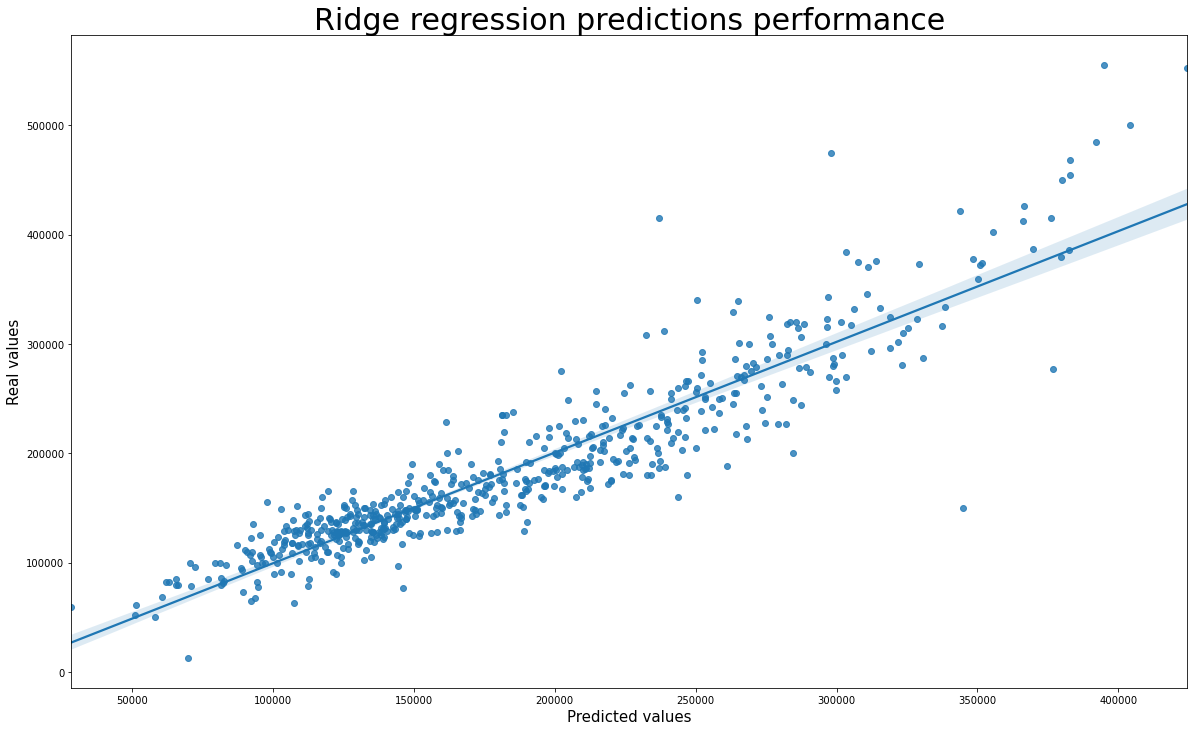

In [35]:
X2 = train_1[corr_features]
y=train_1['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)


sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)


ridge_cv = RidgeCV()

# Fit model using best ridge alpha!
model = ridge_cv.fit(Z_train, y_train)

# Here is the optimal value of alpha

print('optimal alpha=' ,model.alpha_)
print('Ridge model_scores=', model.score(Z_train, y_train))
print('Ridge model prediction score =', model.score(Z_test, y_test))
preds = model.predict(Z_test)


print(f" Root Mean Squared Error = {metrics.mean_squared_error(y_true=y_test, y_pred = preds, squared = False)} ")    

plt.figure(figsize = (20,12))
sns.regplot(preds, y_test)
plt.title('Ridge regression predictions performance', fontsize=30)
plt.xlabel('Predicted values', fontsize=15)
plt.ylabel('Real values', fontsize=15)
 

### LASSO Regression for Model 2:

Optimal alpha:  762.0384206763782
Lasso regression cross validation scores:  [0.85559325 0.85530194 0.6611843  0.84943291 0.75828132]
Lasso regression cross validation mean score:  0.7959587435051343
Lasso regression cross validation scores standard deviation:  0.0768389390033261
Percent variables zeroed out:  0.358974358974359
               variable          coef      abs_coef
0          Overall_Qual  17785.000077  17785.000077
4            1st_Flr_SF  15541.741601  15541.741601
27           2nd_Flr_SF  13013.597979  13013.597979
2           Neighb_Qual  11827.445911  11827.445911
1            Exter_Qual   9935.558623   9935.558623
13        Bsmt_Exposure   6434.966660   6434.966660
3           Garage_Cars   5777.624065   5777.624065
20             Lot_Area   5120.332309   5120.332309
10         Mas_Vnr_Area   4903.176421   4903.176421
24       Roof_Style_Hip   4315.244998   4315.244998
22       Bsmt_Full_Bath   3856.060547   3856.060547
11           Fireplaces   3782.767930   3782.7

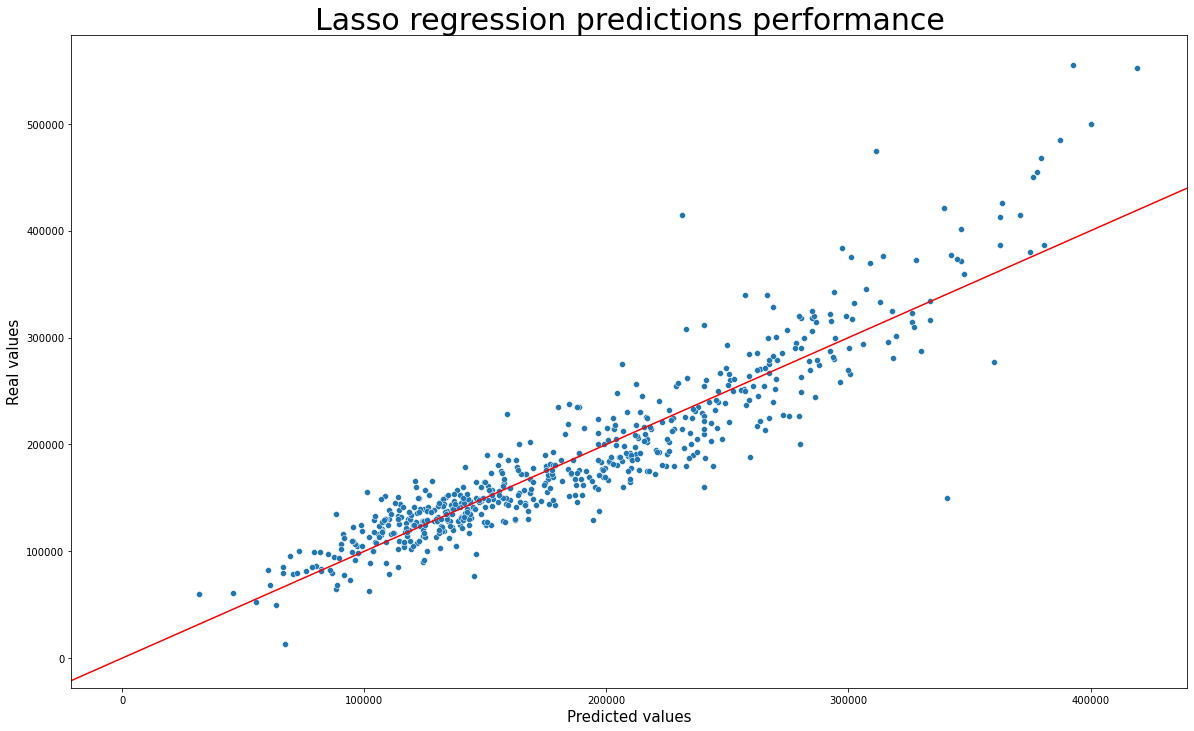

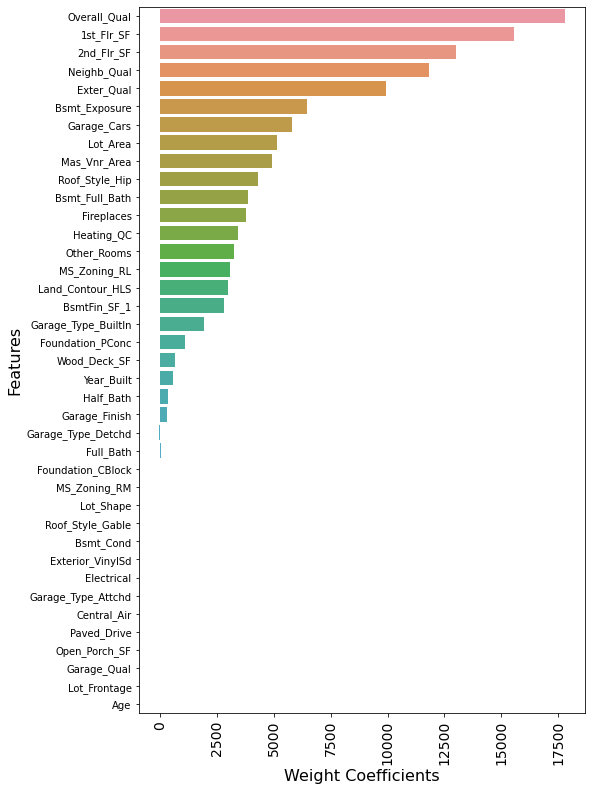

In [37]:
X2 = train_1[corr_features]
y=train_1['SalePrice']
(lasso_m1, ss)=lasso_reg(X2,y)

## Model version 3:

In [38]:
# X features:
lasso_features =['1st_Flr_SF','Overall_Qual','2nd_Flr_SF','Neighb_Qual','Exter_Qual',
# 'Misc_Val',
'Kitchen_Qual',
'Garage_Cars',
'Mas_Vnr_Area',
'Bldg_Type_TwnhsE',
'Other_Rooms',
'Bsmt_Exposure',
'Fireplace_Qu',
'Lot_Area',
'Pool_Area',
'Bldg_Type_TwnhsI',
'Roof_Style_Hip',
'Exterior_Stucco',
'Bsmt_Full_Bath',
'BsmtFin_SF_1',
'Kitchen_AbvGr',
'Screen_Porch',
'Land_Contour_HLS',
'Exterior_CemntBd',
'BsmtFin_Type_1',
'Bsmt_Qual',
'Exterior_BrkFace',
'Lot_Config_CulDSac',
'Overall_Cond',
'Year_Built',
'Garage_Type_BuiltIn',
'Wood_Deck_SF',
'Condition_Norm',
'Half_Bath',
'Heating_QC',
# 'Garage_Yr_Blt',
'Exterior_HdBoard',
'Functional',
'Roof_Style_Shed',
'is_Remodeled',
'Age',
'Full_Bath',
'MS_Zoning_RL',
'Foundation_Slab',
'Exterior_MetalSd',
'Bedroom_AbvGr',
'Bsmt_Cond',
'Condition_PosA',
'Land_Contour_Low',
'Foundation_PConc',
'Bsmt_Half_Bath',
'Enclosed_Porch',
'Exterior_Plywood',
'Garage_Type_Basment',
'Exterior_WdShing']

### Linear Regression for Model 3

----------
Linear regression cross validation scores:  [0.87646101 0.87487287 0.7147034  0.87405564 0.75832388]
Linear regression mean cross validation score:  0.8196833610226546
-----MODEL ACCURACY-----
 Linear Regression model score= 0.8595838017361921 
 Linear Regression prediction score= 0.8692078688818445 
-----METRICS-----
 R2 score = 0.8692078688818445 
 Mean Absolute Error = 19993.428753060613 
 Sum Squared Error = 505207118158.0613 
 Mean Squared Error = 829568338.5189841 
 Root Mean Squared Error = 28802.228013106625 
----------


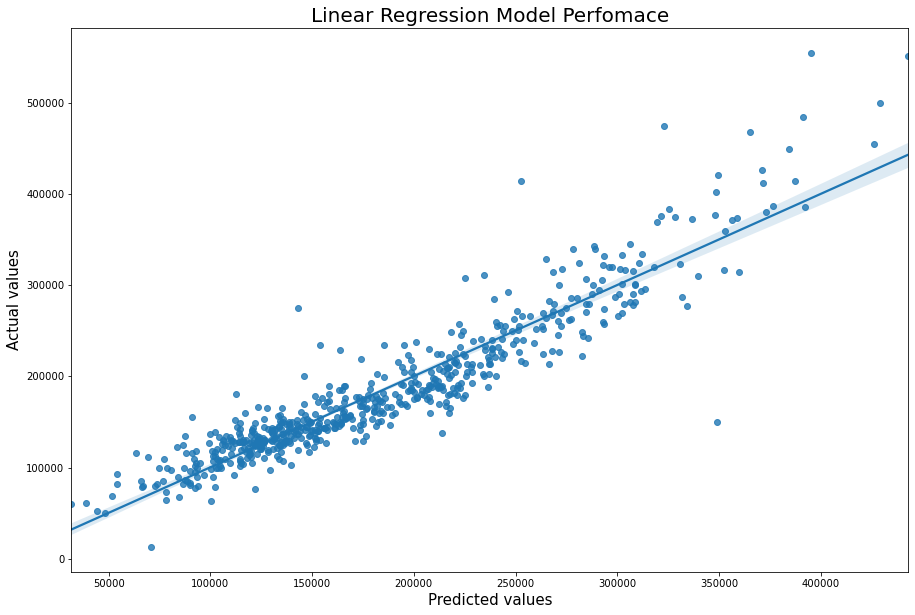

In [39]:
X3 = train_1[lasso_features] 
y = train_1['SalePrice']
(sslr_model, ss) = ss_linear_reg(X3,y)


### Ridge Regression for Model 3

optimal alpha= 10.0
Ridge model_scores= 0.8595628739164517
Ridge model prediction score = 0.8688914983579912
 Root Mean Squared Error = 28837.04154594361 


Text(0, 0.5, 'Real values')

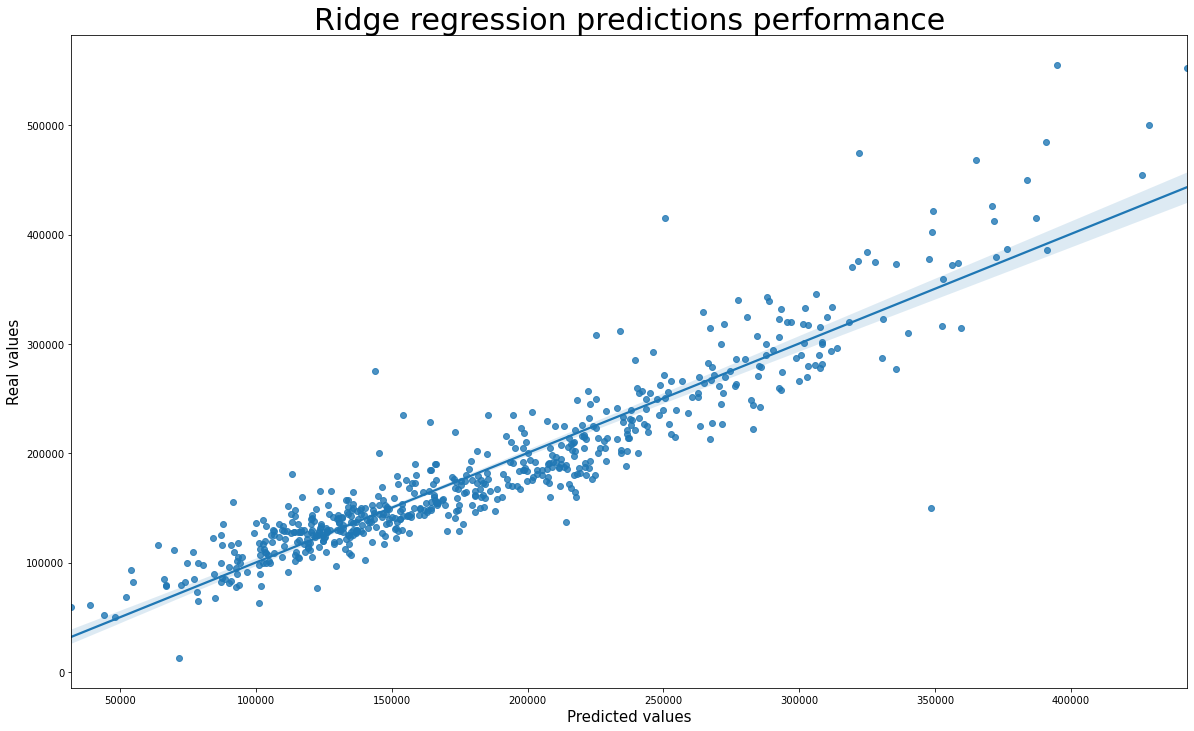

In [41]:
X3 = train_1[lasso_features] 
y3 = train_1['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)


sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

ridge_cv = RidgeCV()

# Fit model using best ridge alpha!
model = ridge_cv.fit(Z_train, y_train)

# Here is the optimal value of alpha

print('optimal alpha=' ,model.alpha_)
print('Ridge model_scores=', model.score(Z_train, y_train))
print('Ridge model prediction score =', model.score(Z_test, y_test))
preds = model.predict(Z_test)

print(f" Root Mean Squared Error = {metrics.mean_squared_error(y_true=y_test, y_pred = preds, squared = False)} ")    

plt.figure(figsize = (20,12))
sns.regplot(preds, y_test)
plt.title('Ridge regression predictions performance', fontsize=30)
plt.xlabel('Predicted values', fontsize=15)
plt.ylabel('Real values', fontsize=15)
 

### LASSO Regression for Model 3

Optimal alpha:  267.5663003833252
Lasso regression cross validation scores:  [0.88050794 0.87150817 0.72766738 0.86997571 0.75603828]
Lasso regression cross validation mean score:  0.8211394961708484
Lasso regression cross validation scores standard deviation:  0.06545501691531604
Percent variables zeroed out:  0.018867924528301886
               variable          coef      abs_coef
0            1st_Flr_SF  14738.238018  14738.238018
1          Overall_Qual  13547.140172  13547.140172
2            2nd_Flr_SF  10576.620362  10576.620362
3           Neighb_Qual  10294.171267  10294.171267
4            Exter_Qual   7343.144533   7343.144533
5          Kitchen_Qual   6331.405742   6331.405742
7          Mas_Vnr_Area   5821.454409   5821.454409
8      Bldg_Type_TwnhsE  -5649.467213   5649.467213
10        Bsmt_Exposure   5490.012584   5490.012584
6           Garage_Cars   5395.658569   5395.658569
11         Fireplace_Qu   5137.743934   5137.743934
9           Other_Rooms   4450.729697   44

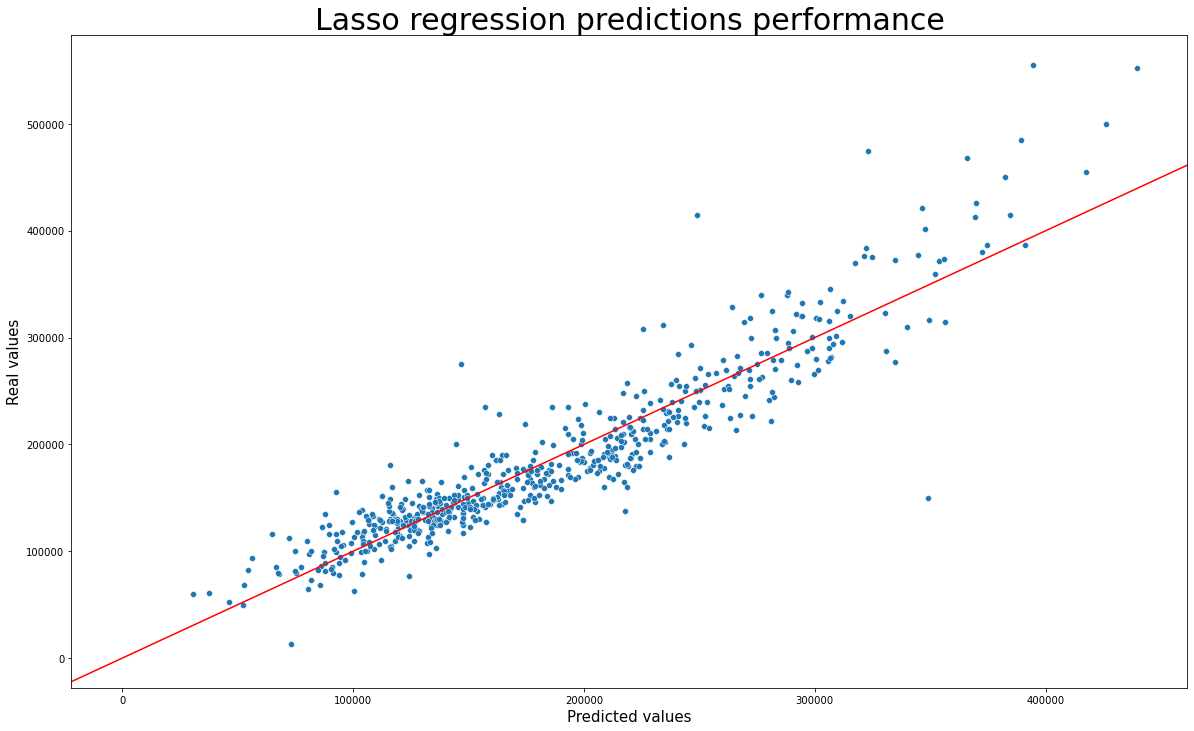

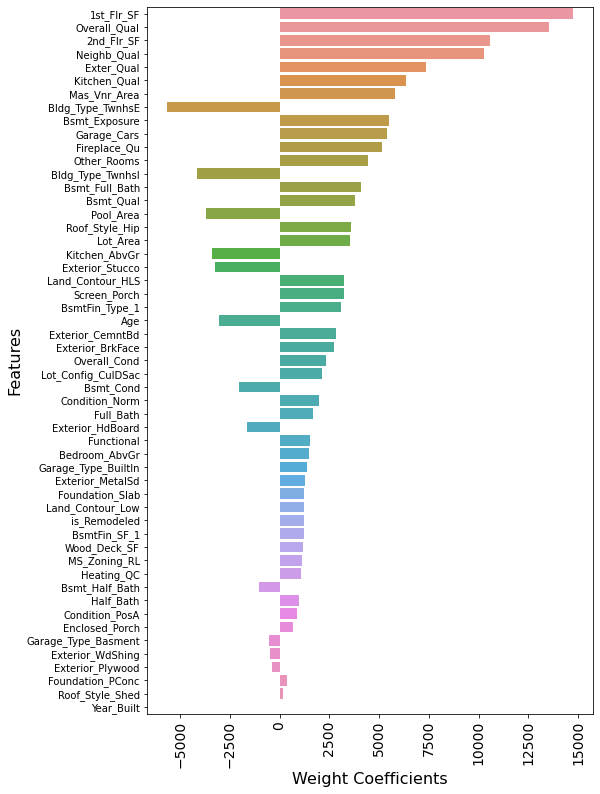

In [42]:
X3 = train_1[lasso_features] 
y3 = train_1['SalePrice']
(opt_lasso, ss) = lasso_reg(X3,y3)


### Model 4: Features after filtering the outliers in the lot area and the home square feet

From the plot below we can filter the outliers in the Lot area and the 1st Floor SF that are causing the skew and see how the moel fits. 

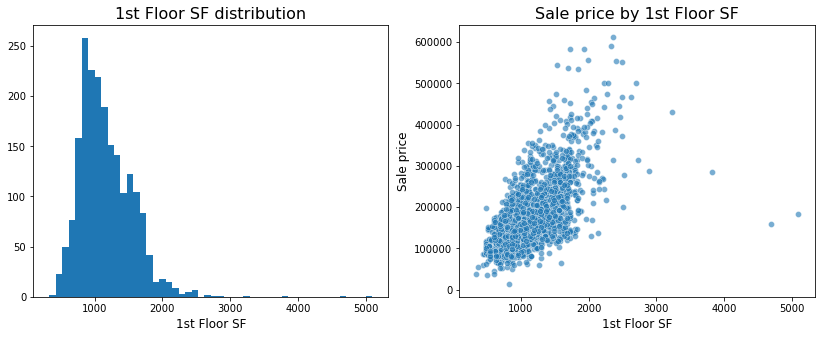

In [43]:
def hist_scatter(df,column,title_list,xlabel):
    fig, ax = plt.subplots(ncols=2, figsize=(14,5))
    ax = ax.ravel()
    ax[0].hist(df[column],bins=50)
    ax[1].scatter(df[column],df['SalePrice'],alpha=0.6, edgecolors='white' ,linewidths=0.5)
    ax[1].set_ylabel('Sale price', fontsize=12)
    for i, column in enumerate(title_list): 
        ax[i].set_xlabel(xlabel, fontsize=12)
        ax[i].set_title(title_list[i], fontsize=16)
        
    return None

hist_scatter(train_1, '1st_Flr_SF',
             ['1st Floor SF distribution','Sale price by 1st Floor SF'],
             '1st Floor SF')

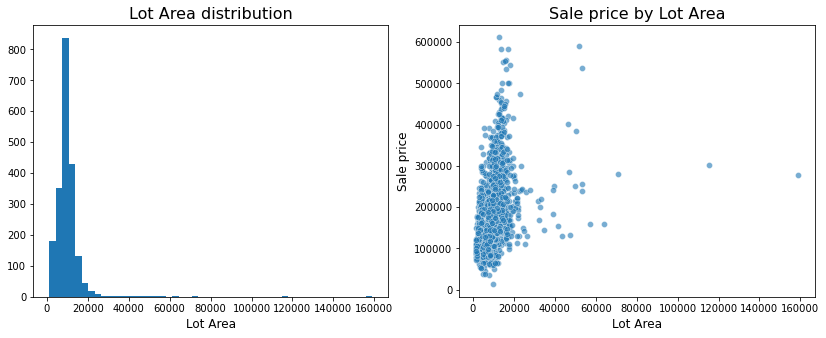

In [45]:
hist_scatter(train_1, 'Lot_Area',
             ['Lot Area distribution','Sale price by Lot Area'],
             'Lot Area')

In [46]:
# filtering the outliers from the 1st Floor SF and Lot Area
train = train_1[(train_1['1st_Flr_SF']<3000) & (train_1['Lot_Area']<30000)]


In [47]:
train.head()

,Id,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,SalePrice,Age,Other_Rooms,Garage_area/car,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Feedr,Condition_Norm,Condition_PosA,Bldg_Type_2FmCon,Bldg_Type_Duplx,Bldg_Type_TwnhsE,Bldg_Type_TwnhsI,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,is_Remodeled,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CemntBd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside
0,109,533352170,70.0,13517,3,3,6,8,1976,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,5,1,5,725,754,0,0.0,0.0,2,1,3,1,4,7,0,0,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,3,130500,34,3,237.5,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,544,531379050,43.0,11492,3,3,7,5,1996,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,5,1,5,913,1209,0,1.0,0.0,2,1,4,1,4,7,1,3,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,4,220000,13,4,279.5,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,153,535304180,68.0,7922,4,3,5,7,1953,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,3,1,5,1057,0,0,1.0,0.0,1,0,3,1,4,7,0,0,1953.0,1,1.0,3,3,3,0,52,0,0,0,0,0,0,1,109000,57,2,246.0,2,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,318,916386060,73.0,9802,4,3,5,5,2006,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,4,1,5,744,700,0,0.0,0.0,2,1,3,1,3,7,0,0,2007.0,3,2.0,3,3,3,100,0,0,0,0,0,0,0,4,174000,4,4,200.0,4,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,255,906425045,82.0,14235,3,3,6,8,1900,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,3,1,5,831,614,0,0.0,0.0,2,0,3,1,3,7,0,0,1957.0,1,2.0,3,3,1,0,59,0,0,0,0,0,0,3,138500,110,3,242.0,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [48]:
X4 = train[corr_features]
y4 = train['SalePrice']

In [120]:
X4.head()

,Overall_Qual,Garage_Cars,1st_Flr_SF,Other_Rooms,Year_Built,Garage_Finish,Full_Bath,Foundation_PConc,Mas_Vnr_Area,Fireplaces,Heating_QC,Bsmt_Exposure,BsmtFin_SF_1,Garage_Type_Attchd,Open_Porch_SF,Lot_Frontage,Exterior_VinylSd,Wood_Deck_SF,Lot_Area,Half_Bath,Bsmt_Full_Bath,Garage_Qual,Roof_Style_Hip,Paved_Drive,Central_Air,2nd_Flr_SF,Electrical,Garage_Type_BuiltIn,Land_Contour_HLS,Bsmt_Cond,MS_Zoning_RL,Roof_Style_Gable,Lot_Shape,MS_Zoning_RM,Foundation_CBlock,Garage_Type_Detchd,Age
0,6,2.0,725,3,1976,2,2,0,289.0,0,5,1,533.0,1,44,70.0,0,0,13517,1,0.0,3,0,3,1,754,5,0,0,3,1,1,3,0,1,0,34
1,7,2.0,913,4,1996,2,2,1,132.0,1,5,1,637.0,1,74,43.0,2,0,11492,1,1.0,3,0,3,1,1209,5,0,0,3,1,1,3,0,0,0,13
2,5,1.0,1057,2,1953,1,1,0,0.0,0,3,1,731.0,0,52,68.0,2,0,7922,0,1.0,3,0,3,1,0,5,0,0,3,1,1,4,0,1,1,57
3,5,2.0,744,4,2006,3,2,1,0.0,0,4,1,0.0,0,0,73.0,2,100,9802,1,0.0,3,0,3,1,700,5,1,0,3,1,1,4,0,0,0,4
4,6,2.0,831,3,1900,1,2,1,0.0,0,3,1,0.0,0,59,82.0,0,0,14235,0,0.0,3,0,1,1,614,5,0,0,4,1,1,3,0,0,1,110


### Linear Model for selected features

----------
Linear regression cross validation scores:  [0.85739473 0.88226964 0.87819044 0.88478354 0.85819974]
Linear regression mean cross validation score:  0.8721676159181225
-----MODEL ACCURACY-----
 Linear Regression model score= 0.8798345309447236 
 Linear Regression prediction score= 0.8865287636417784 
-----METRICS-----
 R2 score = 0.8865287636417784 
 Mean Absolute Error = 18637.423531451943 
 Sum Squared Error = 366167521620.82104 
 Mean Squared Error = 608251697.0445533 
 Root Mean Squared Error = 24662.759315302763 
----------


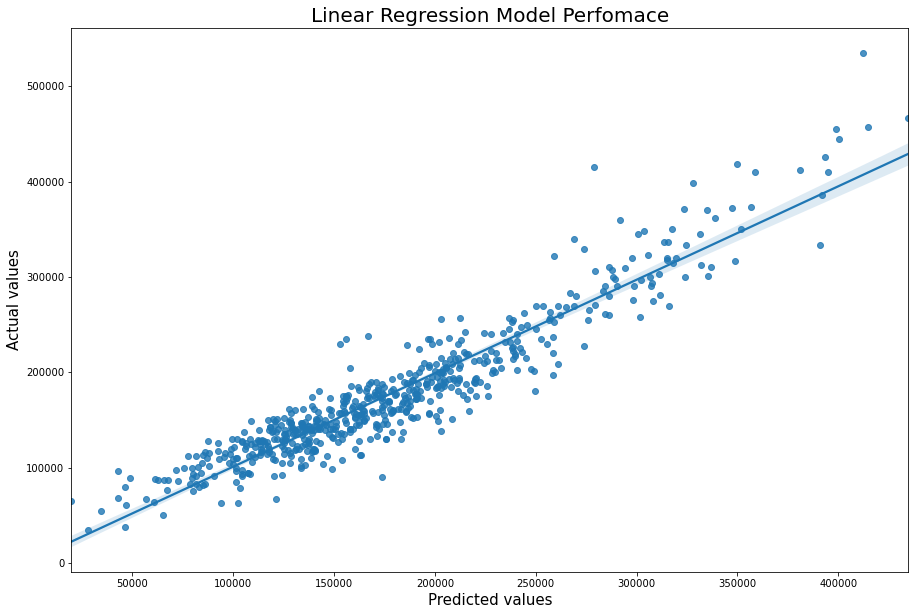

In [50]:
X4 = train[corr_features]
y4 = train['SalePrice']
(sslr_model, ss) = ss_linear_reg(X4,y4)


### Ridge Regression for Selected features

optimal alpha= 10.0
Ridge model_scores= 0.879655043349673
Ridge model prediction score = 0.8874512378453181
 Root Mean Squared Error = 24562.305722552228 


Text(0, 0.5, 'Real values')

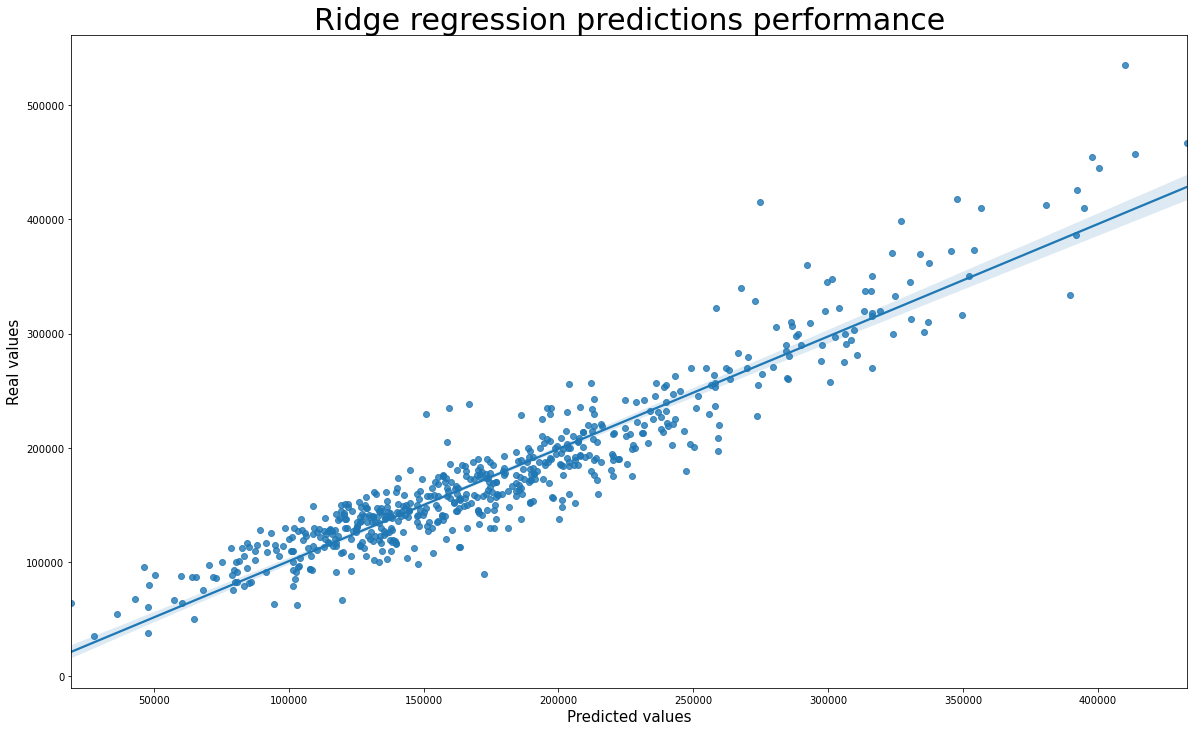

In [51]:
X4 = train[corr_features]
y4 = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)


# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV()

# Fit model using best ridge alpha!
model = ridge_cv.fit(Z_train, y_train)

# Here is the optimal value of alpha

print('optimal alpha=' ,model.alpha_)
print('Ridge model_scores=', model.score(Z_train, y_train))
print('Ridge model prediction score =', model.score(Z_test, y_test))
preds = model.predict(Z_test)

print(f" Root Mean Squared Error = {metrics.mean_squared_error(y_true=y_test, y_pred = preds, squared = False)} ")    

plt.figure(figsize = (20,12))
sns.regplot(preds, y_test)
plt.title('Ridge regression predictions performance', fontsize=30)
plt.xlabel('Predicted values', fontsize=15)
plt.ylabel('Real values', fontsize=15)
 

### LASSO Regression for Selected Features

Optimal alpha:  79.39915122435207
Lasso regression cross validation scores:  [0.85734634 0.88354925 0.8783352  0.88540054 0.85551502]
Lasso regression cross validation mean score:  0.8720292694641216
Lasso regression cross validation scores standard deviation:  0.012958196343052904
Percent variables zeroed out:  0.10256410256410256
               variable          coef      abs_coef
4            1st_Flr_SF  22434.306775  22434.306775
0          Overall_Qual  17878.786795  17878.786795
27           2nd_Flr_SF  17775.654487  17775.654487
1            Exter_Qual  11656.829993  11656.829993
14         BsmtFin_SF_1  11059.660593  11059.660593
24       Roof_Style_Hip   9404.030089   9404.030089
20             Lot_Area   7220.497568   7220.497568
33     Roof_Style_Gable   6411.250854   6411.250854
38                  Age  -5408.988225   5408.988225
10         Mas_Vnr_Area   4777.054653   4777.054653
13        Bsmt_Exposure   4752.461591   4752.461591
2           Neighb_Qual   4634.947770   46

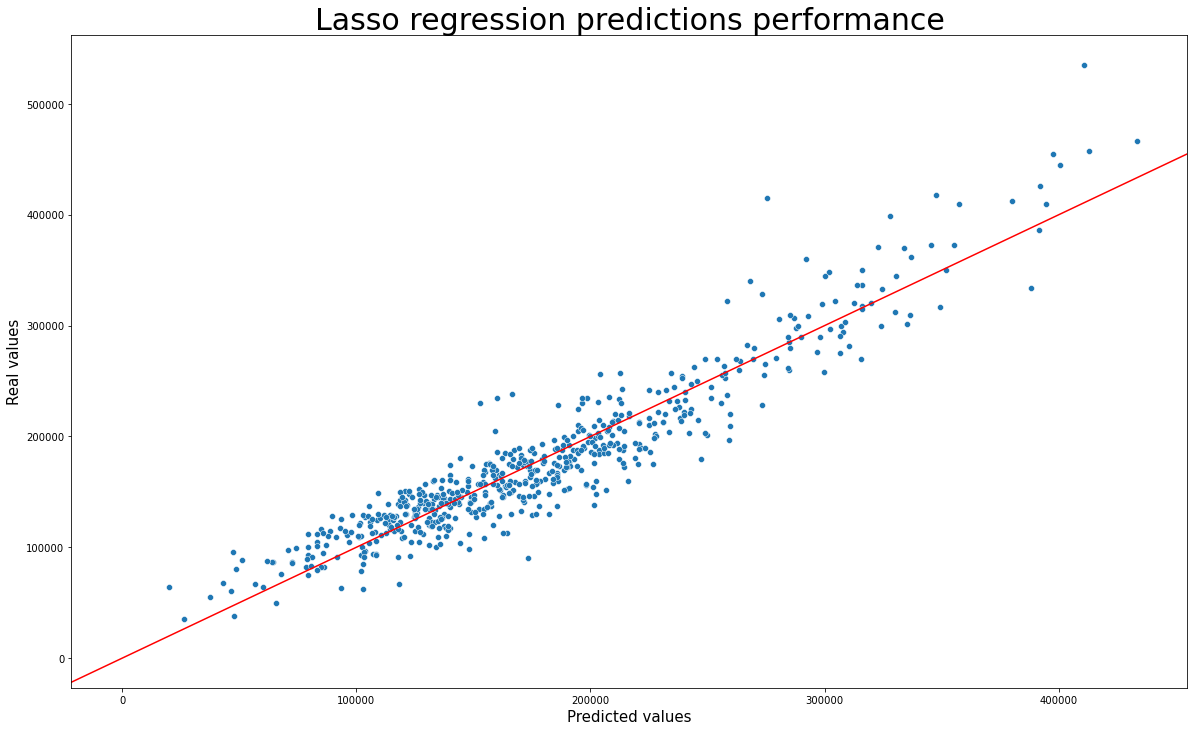

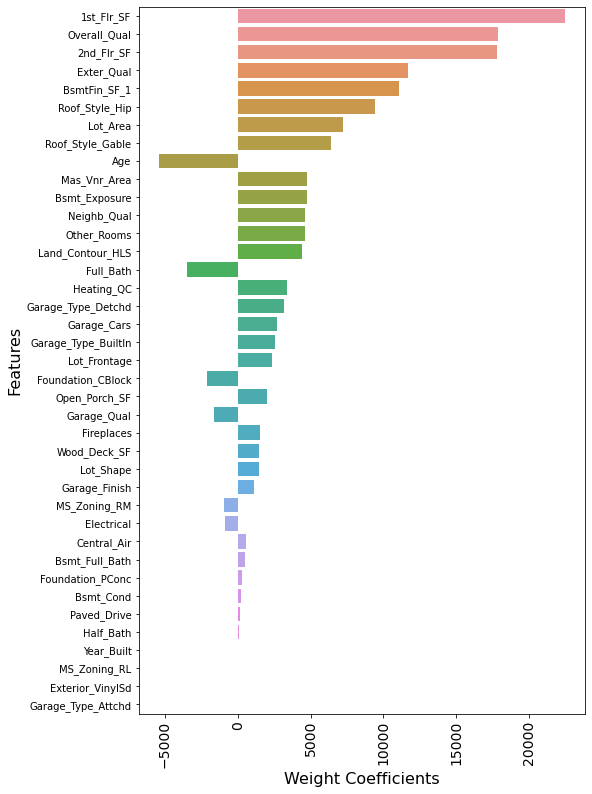

In [52]:
X4 = train[corr_features]
y4 = train['SalePrice']
(opt_lasso, ss) = lasso_reg(X4,y4)


### Model 5: with filtered train and initial features df

In [137]:
# train[features_df.columns]

----------
Linear regression cross validation scores:  [0.90815146 0.89264161 0.91326232 0.91805326 0.92001835]
Linear regression mean cross validation score:  0.9104253990429815
-----MODEL ACCURACY-----
 Linear Regression model score= 0.9281132419116999 
 Linear Regression prediction score= 0.9162614032235389 
-----METRICS-----
 R2 score = 0.9162614032235389 
 Mean Absolute Error = 0.0799053457760507 
 Sum Squared Error = 7.578846983602499 
 Mean Squared Error = 0.012589446816615448 
 Root Mean Squared Error = 0.11220270414127927 
----------


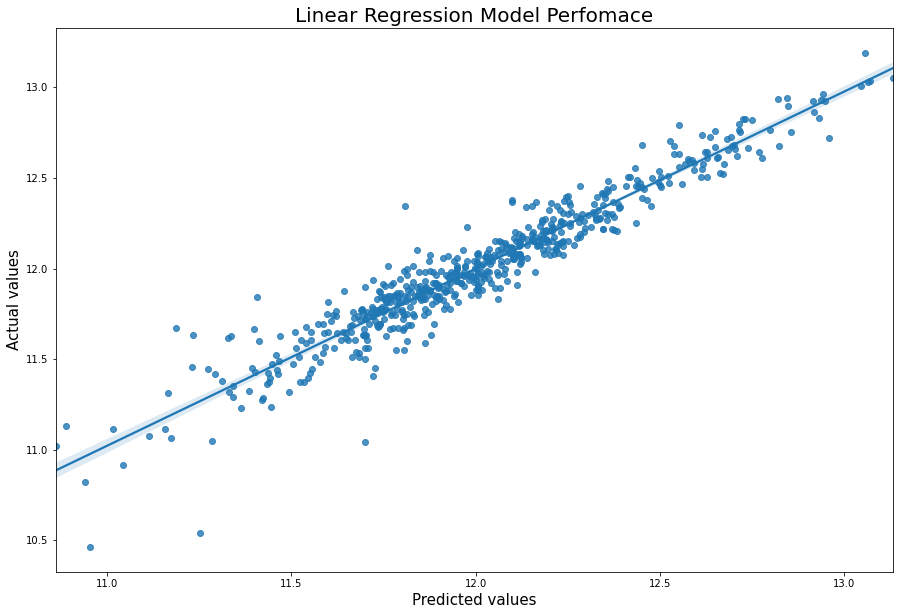

In [53]:
X5 = train[features_df.columns]
y5 = train['SalePrice']
y_log = np.log(y5)
(sslr_model, ss) = ss_linear_reg(X5,y_log)



Optimal alpha:  259.9964241749044
Lasso regression cross validation scores:  [0.87070297 0.90458356 0.89429746 0.90259918 0.87570746]
Lasso regression cross validation mean score:  0.8895781277577741
Lasso regression cross validation scores standard deviation:  0.013897123069305546
Percent variables zeroed out:  0.21212121212121213
               variable          coef      abs_coef
21           1st_Flr_SF  19305.652019  19305.652019
22           2nd_Flr_SF  16864.986093  16864.986093
14         BsmtFin_SF_1  15848.268362  15848.268362
4          Overall_Qual  13274.352607  13274.352607
8            Exter_Qual   7541.125202   7541.125202
49                  Age  -7319.560365   7319.560365
30         Kitchen_Qual   6416.702789   6416.702789
1              Lot_Area   5799.614520   5799.614520
17          Bsmt_Unf_SF   5456.855850   5456.855850
7          Mas_Vnr_Area   5250.022725   5250.022725
50          Other_Rooms   5086.979701   5086.979701
36          Garage_Cars   5036.436301   50

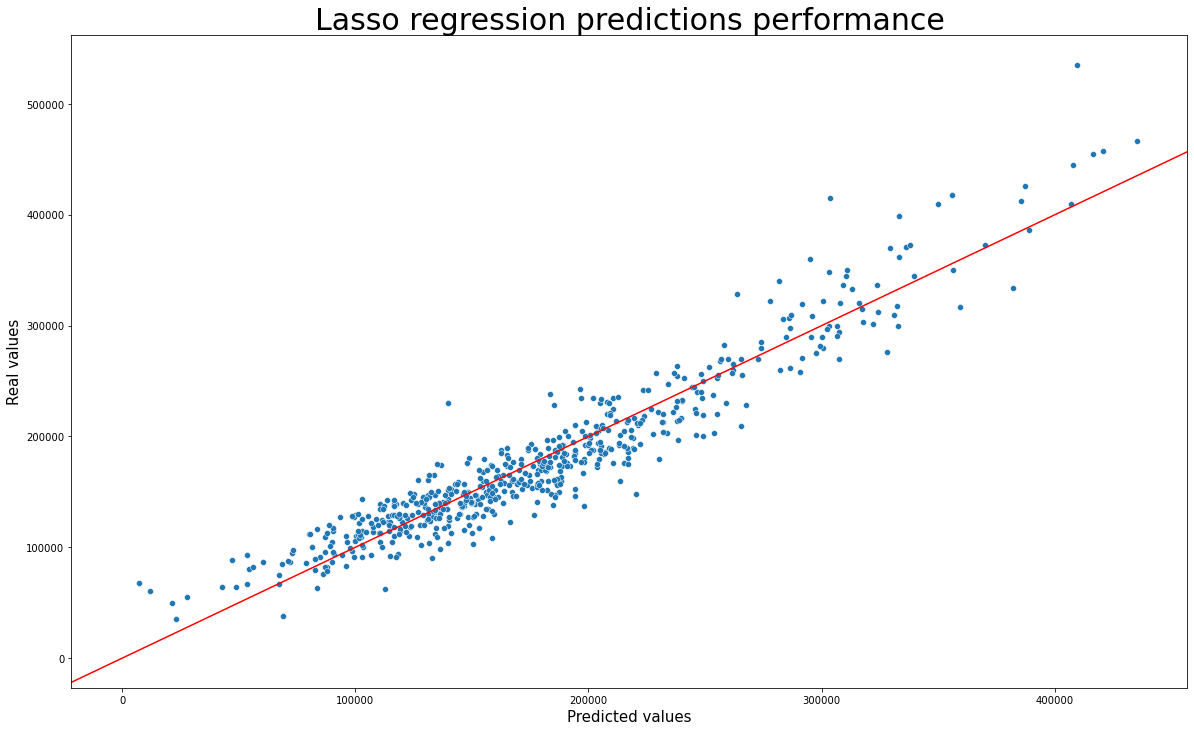

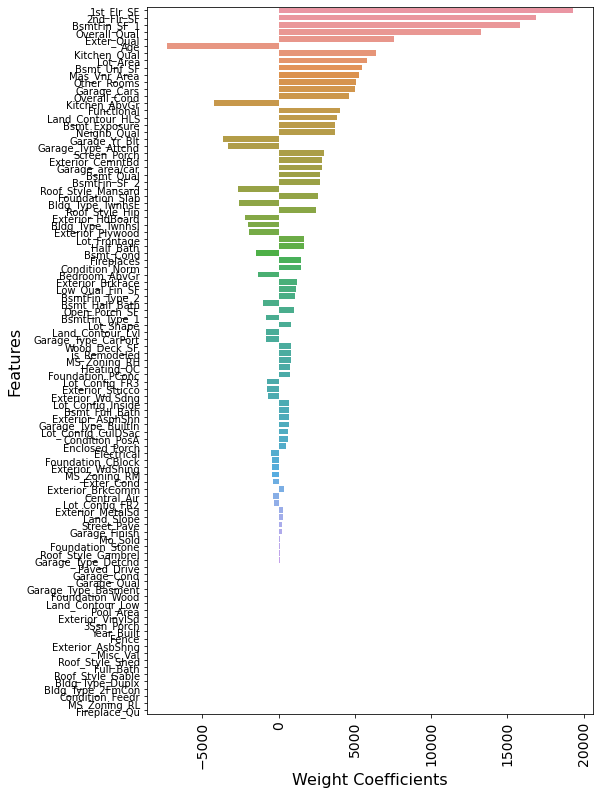

In [54]:
(opt_lasso, ss) = lasso_reg(X5,y5)



### Kaggle submission for model 5

In [132]:
features_test=test_1[features_df.columns]

In [133]:
ks_test = ss.transform(features_test)
kaggle_preds = opt_lasso.predict(ks_test)
print('Kaggle shape:', kaggle_preds.shape)
kaggle_output = {'Id':test['Id'], 'SalePrice':kaggle_preds}
kaggle_output = pd.DataFrame(kaggle_output)
kaggle_output.to_csv('./model5_lasso.csv', index = False)

Kaggle shape: (878,)


In [158]:
# Log transformed saleprice, need to exp 
ks_test = ss.transform(features_test)
kaggle_preds = sslr_model.predict(ks_test)
kaggle_preds = np.exp(kaggle_preds)
print('Kaggle shape:', kaggle_preds.shape)
kaggle_output = {'Id':test['Id'], 'SalePrice':kaggle_preds}
kaggle_output = pd.DataFrame(kaggle_output)
kaggle_output.to_csv('./model5_logged_linear.csv', index = False)

Kaggle shape: (878,)


### Model6: filter the outliers in Saleprice column

In [134]:
train.SalePrice.sort_values()

1611     12789
1277     35000
1547     37900
1412     39300
1076     45000
         ...  
1151    555000
149     556581
1777    582933
1674    584500
1653    611657
Name: SalePrice, Length: 2004, dtype: int64

In [64]:
train.head()

,Id,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,SalePrice,Age,Other_Rooms,Garage_area/car,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Feedr,Condition_Norm,Condition_PosA,Bldg_Type_2FmCon,Bldg_Type_Duplx,Bldg_Type_TwnhsE,Bldg_Type_TwnhsI,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,is_Remodeled,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CemntBd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside
0,109,533352170,70.0,13517,3,3,6,8,1976,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,5,1,5,725,754,0,0.0,0.0,2,1,3,1,4,7,0,0,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,3,130500,34,3,237.5,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,544,531379050,43.0,11492,3,3,7,5,1996,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,5,1,5,913,1209,0,1.0,0.0,2,1,4,1,4,7,1,3,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,4,220000,13,4,279.5,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,153,535304180,68.0,7922,4,3,5,7,1953,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,3,1,5,1057,0,0,1.0,0.0,1,0,3,1,4,7,0,0,1953.0,1,1.0,3,3,3,0,52,0,0,0,0,0,0,1,109000,57,2,246.0,2,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,318,916386060,73.0,9802,4,3,5,5,2006,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,4,1,5,744,700,0,0.0,0.0,2,1,3,1,3,7,0,0,2007.0,3,2.0,3,3,3,100,0,0,0,0,0,0,0,4,174000,4,4,200.0,4,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,255,906425045,82.0,14235,3,3,6,8,1900,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,3,1,5,831,614,0,0.0,0.0,2,0,3,1,3,7,0,0,1957.0,1,2.0,3,3,1,0,59,0,0,0,0,0,0,3,138500,110,3,242.0,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [69]:
train_sale = train[(train['SalePrice']> 20000)]
train_sale.head()

,Id,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,SalePrice,Age,Other_Rooms,Garage_area/car,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Feedr,Condition_Norm,Condition_PosA,Bldg_Type_2FmCon,Bldg_Type_Duplx,Bldg_Type_TwnhsE,Bldg_Type_TwnhsI,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,is_Remodeled,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CemntBd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside
0,109,533352170,70.0,13517,3,3,6,8,1976,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,5,1,5,725,754,0,0.0,0.0,2,1,3,1,4,7,0,0,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,3,130500,34,3,237.5,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,544,531379050,43.0,11492,3,3,7,5,1996,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,5,1,5,913,1209,0,1.0,0.0,2,1,4,1,4,7,1,3,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,4,220000,13,4,279.5,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,153,535304180,68.0,7922,4,3,5,7,1953,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,3,1,5,1057,0,0,1.0,0.0,1,0,3,1,4,7,0,0,1953.0,1,1.0,3,3,3,0,52,0,0,0,0,0,0,1,109000,57,2,246.0,2,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,318,916386060,73.0,9802,4,3,5,5,2006,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,4,1,5,744,700,0,0.0,0.0,2,1,3,1,3,7,0,0,2007.0,3,2.0,3,3,3,100,0,0,0,0,0,0,0,4,174000,4,4,200.0,4,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,255,906425045,82.0,14235,3,3,6,8,1900,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,3,1,5,831,614,0,0.0,0.0,2,0,3,1,3,7,0,0,1957.0,1,2.0,3,3,1,0,59,0,0,0,0,0,0,3,138500,110,3,242.0,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [70]:
train_sale = train_sale[train_sale['SalePrice']<500000]

In [71]:
train_sale.head()

,Id,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,SalePrice,Age,Other_Rooms,Garage_area/car,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Feedr,Condition_Norm,Condition_PosA,Bldg_Type_2FmCon,Bldg_Type_Duplx,Bldg_Type_TwnhsE,Bldg_Type_TwnhsI,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,is_Remodeled,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CemntBd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside
0,109,533352170,70.0,13517,3,3,6,8,1976,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,5,1,5,725,754,0,0.0,0.0,2,1,3,1,4,7,0,0,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,3,130500,34,3,237.5,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,544,531379050,43.0,11492,3,3,7,5,1996,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,5,1,5,913,1209,0,1.0,0.0,2,1,4,1,4,7,1,3,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,4,220000,13,4,279.5,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,153,535304180,68.0,7922,4,3,5,7,1953,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,3,1,5,1057,0,0,1.0,0.0,1,0,3,1,4,7,0,0,1953.0,1,1.0,3,3,3,0,52,0,0,0,0,0,0,1,109000,57,2,246.0,2,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,318,916386060,73.0,9802,4,3,5,5,2006,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,4,1,5,744,700,0,0.0,0.0,2,1,3,1,3,7,0,0,2007.0,3,2.0,3,3,3,100,0,0,0,0,0,0,0,4,174000,4,4,200.0,4,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,255,906425045,82.0,14235,3,3,6,8,1900,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,3,1,5,831,614,0,0.0,0.0,2,0,3,1,3,7,0,0,1957.0,1,2.0,3,3,1,0,59,0,0,0,0,0,0,3,138500,110,3,242.0,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


### Log Transformation of the Saleprice Column
The sale price exhibited a right-skewed distribution that was corrected by taking the log. Once the log was taken, we were no longer violating the normality assumption for regressions. The distribution of price is right-skewed. Log transformation techniques will be used to make the distribution more normal.

Text(0.5, 1.0, 'SalePrice Distribution, Pre-Transformation')

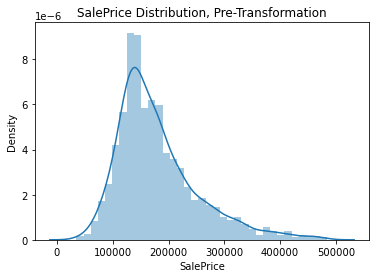

In [72]:
sns.distplot(train_sale.SalePrice).set_title('SalePrice Distribution, Pre-Transformation')

Text(0.5, 1.0, 'SalePrice Distribution, Post-Transformation')

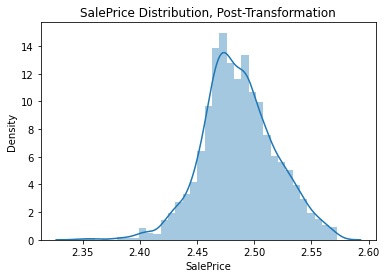

In [74]:
train_sale.SalePrice = [np.log(i) for i in train_sale.SalePrice]
sns.distplot(train_sale.SalePrice).set_title('SalePrice Distribution, Post-Transformation')



### Linear Regression for Model6

----------
Linear regression cross validation scores:  [  0.93357958   0.90759782 -24.285976     0.92169947   0.91854463]
Linear regression mean cross validation score:  -4.120910900164219
-----MODEL ACCURACY-----
 Linear Regression model score= 0.9346387372123593 
 Linear Regression prediction score= 0.9053428640551273 
-----METRICS-----
 R2 score = 0.9053428640551273 
 Mean Absolute Error = 0.006634665932390435 
 Sum Squared Error = 0.05196701788026979 
 Mean Squared Error = 8.690136769275885e-05 
 Root Mean Squared Error = 0.009322090307048031 
----------


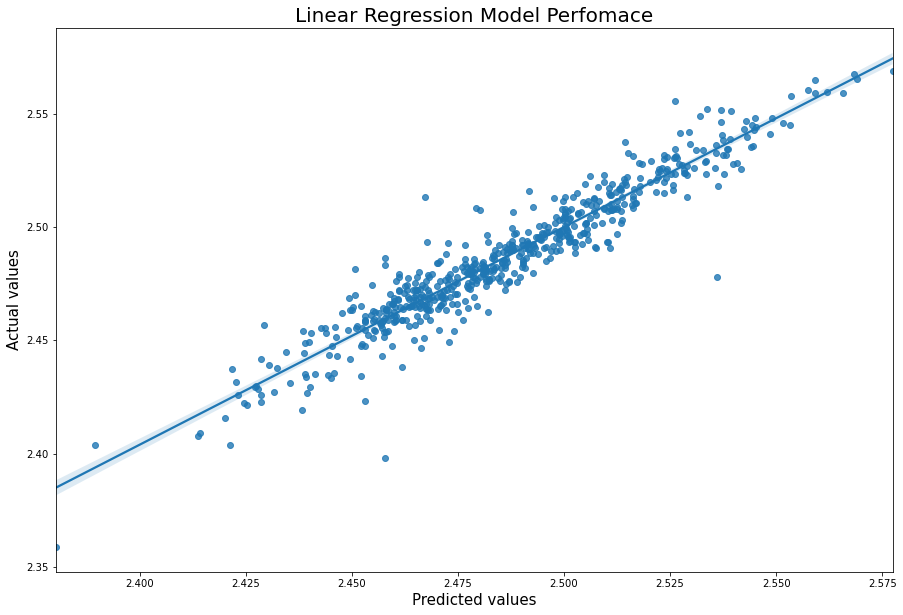

In [75]:
X6 = train_sale[features_df.columns]
y6 = train_sale['SalePrice']

(sslr_model, ss) = ss_linear_reg(X6,y6)


### LASSO Regression with model 6:

Optimal alpha:  8.76243682840765e-05
Lasso regression cross validation scores:  [0.93360954 0.90753617 0.9249976  0.92415414 0.91602566]
Lasso regression cross validation mean score:  0.9212646208088525
Lasso regression cross validation scores standard deviation:  0.00883853324536954
Percent variables zeroed out:  0.20202020202020202
               variable          coef      abs_coef
21           1st_Flr_SF  7.840552e-03  7.840552e-03
22           2nd_Flr_SF  7.822356e-03  7.822356e-03
4          Overall_Qual  6.609116e-03  6.609116e-03
49                  Age -4.949339e-03  4.949339e-03
14         BsmtFin_SF_1  4.569247e-03  4.569247e-03
5          Overall_Cond  4.089267e-03  4.089267e-03
1              Lot_Area  2.724315e-03  2.724315e-03
17          Bsmt_Unf_SF  2.457934e-03  2.457934e-03
36          Garage_Cars  1.996030e-03  1.996030e-03
59         MS_Zoning_RM -1.920082e-03  1.920082e-03
31           Functional  1.916054e-03  1.916054e-03
18           Heating_QC  1.590853e-03  1

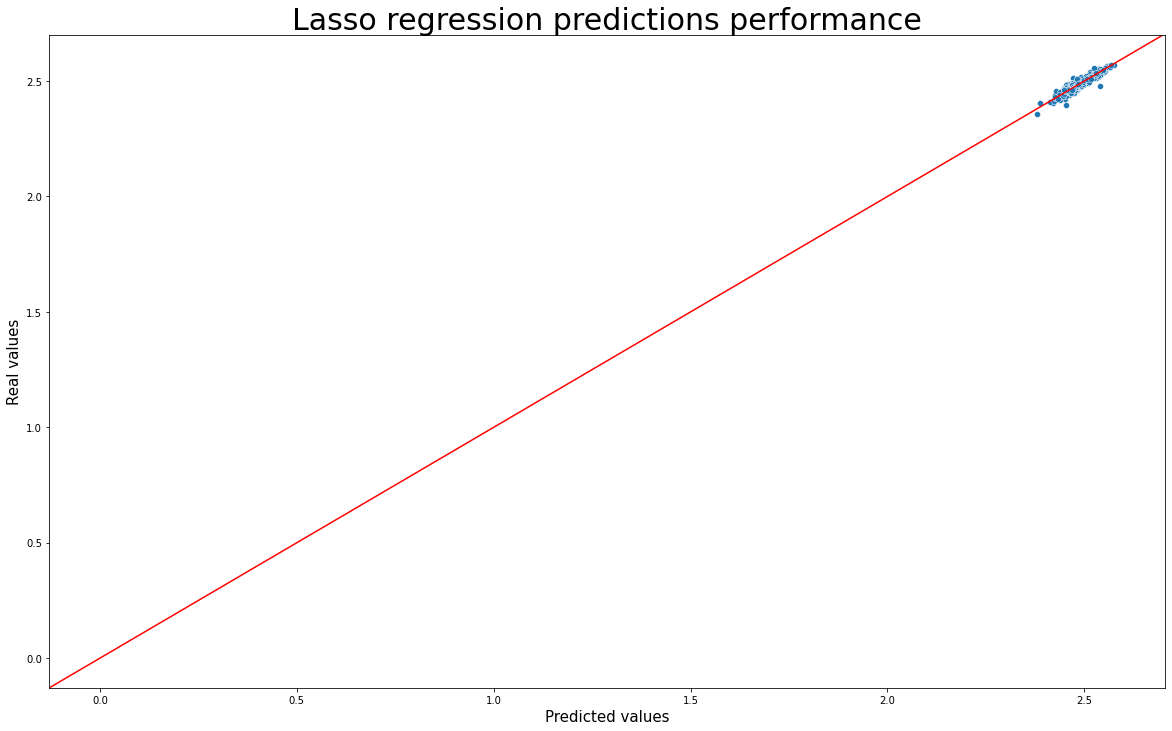

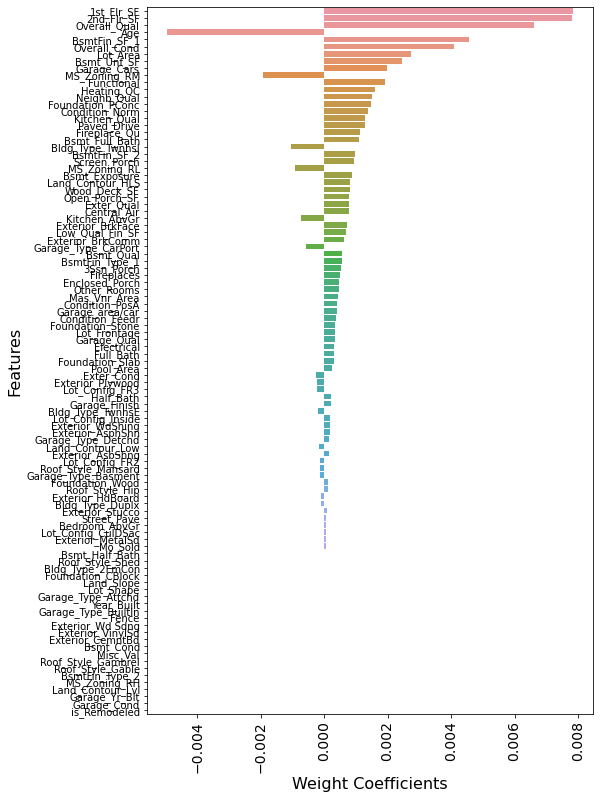

In [76]:
(opt_lasso, ss) = lasso_reg(X6,y6)


### Kaggle Submnission for model 6

In [155]:
# Log transformed saleprice, need to exp 
ks_test = ss.transform(features_test)
kaggle_preds = sslr_model.predict(ks_test)
kaggle_preds = np.exp(kaggle_preds)
print('Kaggle shape:', kaggle_preds.shape)
kaggle_output = {'Id':test['Id'], 'SalePrice':kaggle_preds}
kaggle_output = pd.DataFrame(kaggle_output)
kaggle_output.to_csv('./model6_linear.csv', index = False)

Kaggle shape: (878,)


### Model7: removing the outliers in the Lot Area and the Sale Price together.

In [189]:
train.SalePrice.sort_values()

1611     12789
1277     35000
1547     37900
1412     39300
1076     45000
         ...  
1151    555000
149     556581
1777    582933
1674    584500
1653    611657
Name: SalePrice, Length: 2004, dtype: int64

In [77]:
train_filtered =train[(train['SalePrice']> 20000)]
train_filtered = train_filtered[(train_filtered['SalePrice']<500000)]
    

In [79]:
df_sales = train[(train['SalePrice']> 20000)]

In [80]:
 df_filtered = df_sales[df_sales['SalePrice']<500000]

In [81]:
X7 = df_filtered[features_df.columns]
y7 = df_filtered['SalePrice']
log_y7 = np.log(y7)
X7.shape, y7.shape

((1992, 99), (1992,))

In [82]:
def log_lasso_reg(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    ss = StandardScaler()
    Xs_train = ss.fit_transform(X_train)
    Xs_test = ss.transform(X_test)
    lasso = LassoCV()
    lasso.fit(Xs_train, y_train)
    opt_lasso = Lasso(alpha=lasso.alpha_)
    opt_lasso_scores = cross_val_score(opt_lasso, X_train, y_train, cv=5)
    print('Optimal alpha: ', lasso.alpha_)
    print('Lasso regression cross validation scores: ', opt_lasso_scores)
    print('Lasso regression cross validation mean score: ', np.mean(opt_lasso_scores))
    print('Lasso regression cross validation scores standard deviation: ', np.std(opt_lasso_scores))
    opt_lasso.fit(Xs_train,y_train)
    opt_lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':opt_lasso.coef_,
                            'abs_coef':np.abs(opt_lasso.coef_)})
    opt_lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    print('Percent variables zeroed out: ', np.sum((opt_lasso.coef_ == 0))/float(X_train.shape[1]))
    print(opt_lasso_coefs)
    predictions = opt_lasso.predict(Xs_test)
    predictions = np.exp(predictions)
    print('Lasso regression model score: ', opt_lasso.score(Xs_train, y_train))
    print('Lasso regression prediction score: ', opt_lasso.score(Xs_test, y_test))
    print(f" Root Mean Squared Error = {metrics.mean_squared_error(y_true=y_test, y_pred = predictions, squared = False)} ")    
    plt.figure(figsize = (20,12))
    sns.regplot(predictions, y_test)
    plt.title('Lasso regression predictions performance', fontsize=30)
    plt.xlabel('Predicted values', fontsize=15)
    plt.ylabel('Real values', fontsize=15)
#     plt.axline([0, 0], [1, 1], color='red')
    return (opt_lasso, ss)

### Model 7: LASSO regression

### Kaggle Submnission for model 7

In [ ]:
# Log transformed saleprice, need to exp 
ks_test = ss.transform(features_test)
kaggle_preds = sslr_model.predict(ks_test)
kaggle_preds = np.exp(kaggle_preds)
print('Kaggle shape:', kaggle_preds.shape)
kaggle_output = {'Id':test['Id'], 'SalePrice':kaggle_preds}
kaggle_output = pd.DataFrame(kaggle_output)
kaggle_output.to_csv('./model6_linear.csv', index = False)

### Model 7: Linear Regression

In [84]:
def log_ss_linear_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    ss = StandardScaler()
    Xs_train = ss.fit_transform(X_train)
    Xs_test = ss.transform(X_test)
    lr = LinearRegression()
    lr_scores = cross_val_score(lr, Xs_train, y_train, cv=5)
    print('-' * 10)
    print('Linear regression cross validation scores: ', lr_scores)
    print('Linear regression mean cross validation score: ', np.mean(lr_scores))
    lr_model = lr.fit(Xs_train,y_train)
    preds = lr_model.predict(Xs_test)
    lr_model_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lr_model.coef_,
                            'abs_coef':np.abs(lr_model.coef_)})
    lr_model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    print('-----MODEL ACCURACY-----')
    print(f" Linear Regression model score= {lr_model.score(Xs_train, y_train)} ")
    print(f" Linear Regression prediction score= {lr_model.score(Xs_test, y_test)} ")
    print("-----METRICS-----")
    print(f" R2 score = {metrics.r2_score(y_test, preds)} ")
    print(f" Mean Absolute Error = {metrics.mean_absolute_error(y_test, preds)} ")
    print(f" Sum Squared Error = {metrics.mean_squared_error(y_test, preds)* y_test.shape[0]} ")
    print(f" Mean Squared Error = {metrics.mean_squared_error(y_true = y_test, y_pred = preds)} ")
    print(f" Root Mean Squared Error = {metrics.mean_squared_error(y_true=y_test, y_pred = preds, squared = False)} ")    
    print(lr_model_coefs)
    print('-' * 10)
    plt.figure(figsize = (15,10))
    sns.regplot(preds, y_test)
    plt.title('Linear Regression Model Perfomace', fontsize=20)
    plt.xlabel('Predicted values', fontsize=15)
    plt.ylabel('Actual values', fontsize=15)
    
    return (lr_model, ss)


----------
Linear regression cross validation scores:  [0.91739933 0.90542043 0.89211281 0.90236686 0.9134907 ]
Linear regression mean cross validation score:  0.906158024692397
-----MODEL ACCURACY-----
 Linear Regression model score= 0.9226946203904625 
 Linear Regression prediction score= 0.8725453117074221 
-----METRICS-----
 R2 score = 0.8725453117074221 
 Mean Absolute Error = 17990.32143646484 
 Sum Squared Error = 365799180802.2988 
 Mean Squared Error = 611704315.7229078 
 Root Mean Squared Error = 24732.6568674477 
               variable          coef      abs_coef
22           2nd_Flr_SF  20681.284343  20681.284343
49                  Age -20604.591987  20604.591987
14         BsmtFin_SF_1  17871.540422  17871.540422
21           1st_Flr_SF  17689.817784  17689.817784
4          Overall_Qual  12650.315319  12650.315319
6            Year_Built -11741.131657  11741.131657
34        Garage_Yr_Blt  -9919.770475   9919.770475
17          Bsmt_Unf_SF   9076.303889   9076.303889
37

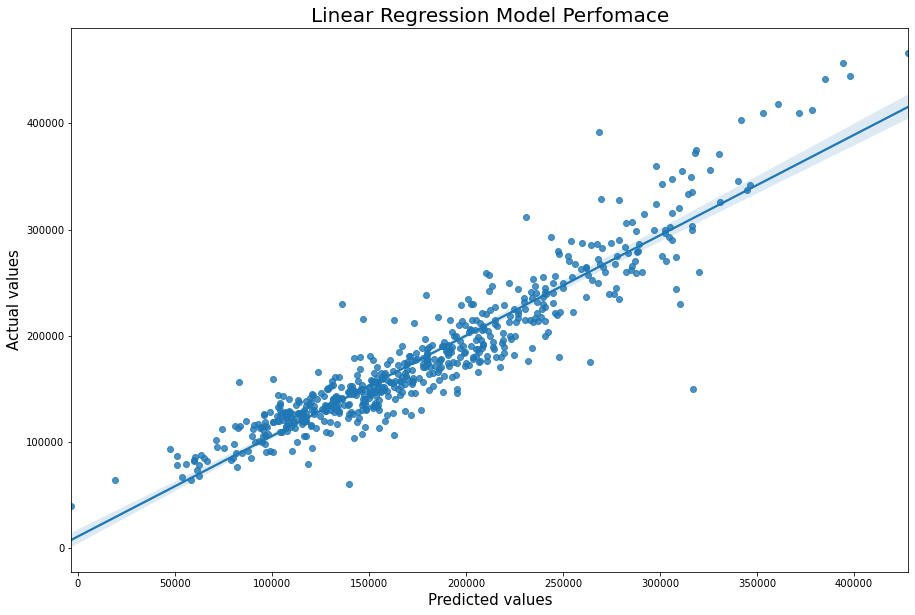

In [85]:
(lr_model, ss) = log_ss_linear_reg(X7,y7)

###  LASSO Regression with polynimial features on pre-selected features


In [86]:

train.shape

(2004, 102)

In [87]:
selected_feat = ['1st_Flr_SF', '2nd_Flr_SF', 'Age', 'Bedroom_AbvGr', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 
                 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Bsmt_Unf_SF', 'Enclosed_Porch', 'Fireplaces', 
                 'Full_Bath', 'Garage_Cars', 'Garage_area/car', 'Half_Bath', 'Kitchen_Qual', 'Lot_Area', 
                 'Lot_Shape', 'Open_Porch_SF', 'Other_Rooms', 'Overall_Qual', 'Pool_Area', 'Screen_Porch', 
                 'Wood_Deck_SF', 'Year_Built', 'is_Remodeled']



In [88]:
X8 = train_1[selected_feat]
y8 = train_1['SalePrice']

In [89]:
pf = PolynomialFeatures(degree = 2, include_bias=False)
# pf = pf.fit(X7)
X_poly = pf.fit_transform(X8)

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly,y8,test_size = 0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X7,y7,test_size = 0.2, random_state=42)

In [96]:
X_train.shape, X_test.shape

((1593, 99), (399, 99))

In [97]:
y_train.shape, y_test.shape

((1593,), (399,))

In [94]:
X_poly_train.shape, X_poly_test.shape

((1623, 377), (406, 377))

In [95]:
y_poly_train.shape, y_poly_test.shape

((1623,), (406,))

In [ ]:
# ss = StandardScaler()
# ss.fit(X_train)

# Xs_train = ss.transform(X_train)
# Xs_test = ss.transform(X_test)

In [98]:
# Polynomial features:
ss = StandardScaler()

X_poly_train_ss = ss.fit_transform(X_poly_train)
X_poly_test_ss = ss.transform(X_poly_test)

In [100]:
y_log_train = np.log(y_poly_train)
y_log_train.shape

(1623,)

In [101]:
lasso = LassoCV(max_iter=10000)
# ridge = RidgeCV()

In [102]:
# print(cross_val_score(lasso, Xs_train,y_log_train, cv = 5))
# print(cross_val_score(lasso, Xs_train,y_log_train,cv = 5).mean())

# print(cross_val_score(ridge, X_poly_train_ss,y_log_train, cv = 5))
# print(cross_val_score(ridge, X_poly_train_ss,y_log_train,cv = 5).mean())

print(cross_val_score(lasso, X_poly_train_ss,y_log_train, cv = 5))
print(cross_val_score(lasso, X_poly_train_ss,y_log_train,cv = 5).mean())

[0.90964174 0.89157937 0.82106273 0.86467635 0.79945293]
0.8572826256679786


In [103]:
# lasso.fit(Xs_train, y_log_train)

# print(lasso.score(Xs_train,y_log_train))

# lasso_pred = lasso.predict(Xs_test)
# lasso_pred = np.exp(lasso_pred)
# r2_score(y_test,lasso_pred)

lasso.fit(X_poly_train_ss, y_log_train)

print(lasso.score(X_poly_train_ss,y_log_train))

lasso_pred = lasso.predict(X_poly_test_ss)
lasso_pred = np.exp(lasso_pred)
r2_score(y_poly_test,lasso_pred)

0.9098147564952417


0.8809961999196271

In [105]:
# RMSE
metrics.mean_squared_error(y_true=y_poly_test, y_pred = lasso_pred, squared = False)

26716.098893775536

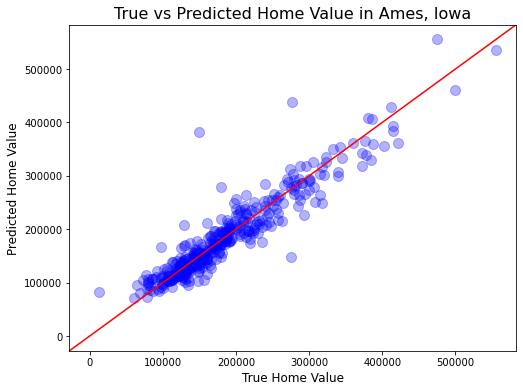

In [106]:
plt.figure(figsize = (8,6))

plt.scatter(y_poly_test, lasso_pred, color ='blue', alpha = 0.3,s=100)
plt.xlabel('True Home Value', size = 12)
plt.ylabel('Predicted Home Value', size = 12)
plt.title('True vs Predicted Home Value in Ames, Iowa', size = 16)

plt.axline([0, 0], [1, 1], color='red')


In [107]:
coefs = dict(zip(selected_feat,list(lasso.coef_)))
coefs


{'1st_Flr_SF': 0.0,
 '2nd_Flr_SF': 0.04681581366795865,
 'Age': -0.0,
 'Bedroom_AbvGr': 0.0,
 'BsmtFin_SF_1': 0.10701151492175677,
 'BsmtFin_SF_2': 0.0,
 'Bsmt_Full_Bath': 0.0,
 'Bsmt_Half_Bath': 0.0,
 'Bsmt_Unf_SF': 0.0,
 'Enclosed_Porch': 0.0,
 'Fireplaces': 0.0,
 'Full_Bath': 0.0,
 'Garage_Cars': 0.0,
 'Garage_area/car': 0.0,
 'Half_Bath': 0.0,
 'Kitchen_Qual': 0.0,
 'Lot_Area': 0.0,
 'Lot_Shape': -0.0,
 'Open_Porch_SF': 0.0,
 'Other_Rooms': 0.0,
 'Overall_Qual': 0.11632225327939255,
 'Pool_Area': 0.0,
 'Screen_Porch': 0.0,
 'Wood_Deck_SF': 0.017837689483529675,
 'Year_Built': 0.0,
 'is_Remodeled': 0.0}

In [108]:
lasso.intercept_


12.034992388250943

### Kaggle submission using polynomial features on preselected features.

In [179]:
# Log transformed saleprice, need to exp 
features_test = test_1[selected_feat]
ks_test = ss.transform(pf.transform(features_test))
kaggle_preds = lasso.predict(ks_test)
kaggle_preds = np.exp(kaggle_preds)
print('Kaggle shape:', kaggle_preds.shape)
kaggle_output = {'Id':test['Id'], 'SalePrice':kaggle_preds}
kaggle_output = pd.DataFrame(kaggle_output)
kaggle_output.to_csv('./model7_poly_lasso.csv', index = False)

Kaggle shape: (878,)


Using Polynomial features on selected features and lasso regression
Kaggle RMSE SCORE =25821.87935

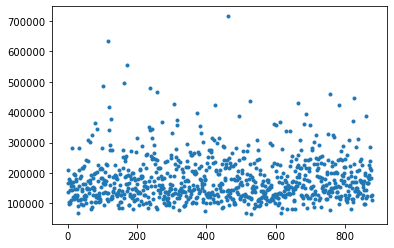

In [183]:
plt.plot(kaggle_preds, '.')

****